# Stock Price Forecasting

Exploring the *Time Series Problem* of stock market forecasting.


All Datasets available @

    BTC, AAPL, MSFT, TSLA, ^IXIC(NASDAQ), ^BVSP(IBOVESPA):
    https://finance.yahoo.com/

    S&P 500:
    https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks?select=sp500_index.csv

Group Members:

    200028880 - Wallace Ben Teng Lin Wu

    222011561 - Mateus Elias de Macedo
    
    222011525 - Erick Hideki Taira

    221029051 - Rodrigo Marques Maranhao

**Notes not generated by the slides:**

Comando para gerar os Slides:

```bash
jupyter nbconvert Prices.ipynb --to slides --SlidesExporter.reveal_scroll=True
```

    Reveal.initialize({
        width: 1200,
        controls: true,
        progress: true,
        history: true,
        transition: "slide",
        slideNumber: "",
        plugins: [RevealNotes]
    });

# Preprocessing

Converting raw data into a format suitable for analysis.

**Example of the process:**

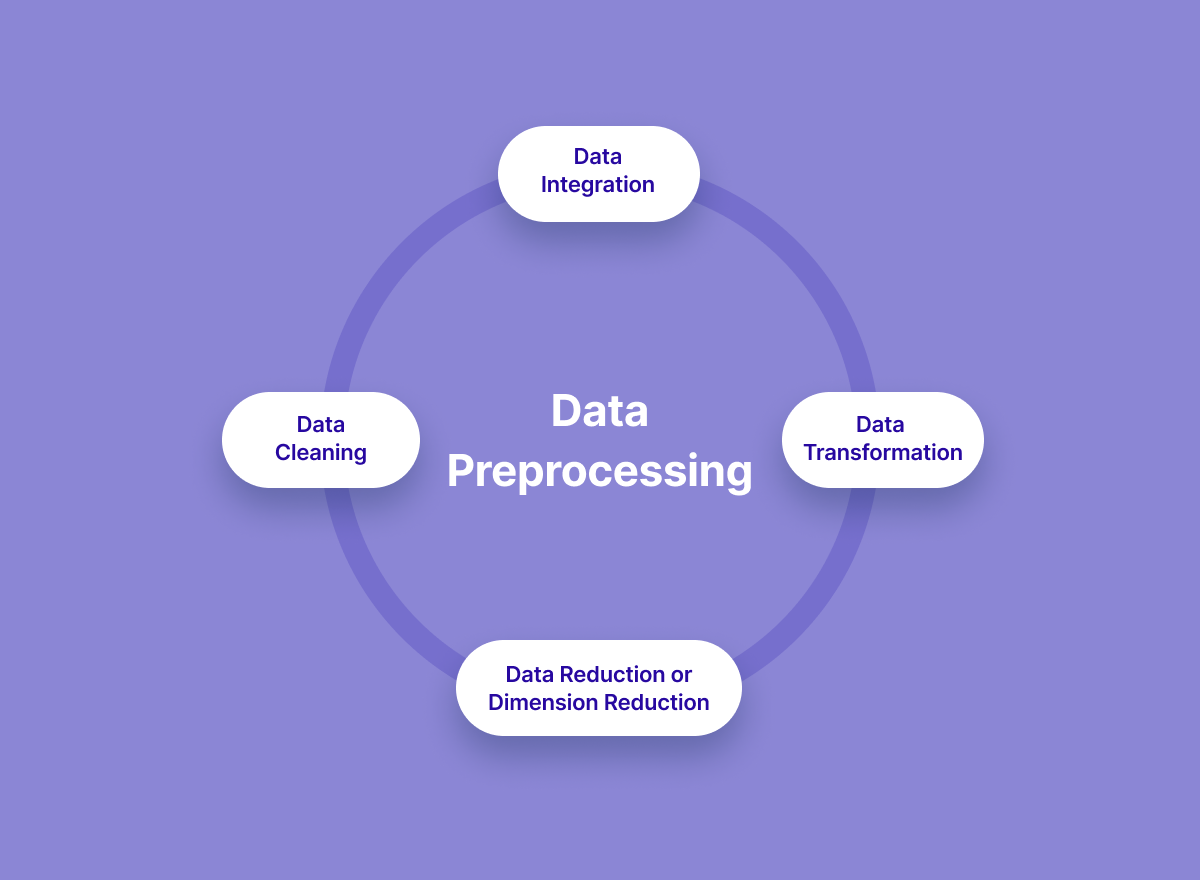

In [1]:
import pandas as pd
import datetime

def str_to_datetime(s):
    """ Converts a string object to the respective datetime object"""

    year, month, day = [int(i) for i in s.split('-')]
    return datetime.datetime(year=year, month=month, day=day)


price_dict = {
    "Adj Close" : "Price",
    "S&P500" : "Price",
}

def load_df(filename):
    """
    Create a pandas dataframe, filter to leave only the Price column,
    convert date to datetime and make it the index
    """

    df = pd.read_csv(filename)
    df.rename(columns = price_dict, inplace = True)

    # Univariate analysis
    df = df[["Date", "Price"]]

    # Convert date type objects to datetime object
    df["Date"] = df["Date"].apply(str_to_datetime)

    # Turn "Date" Column into dataframe index
    df.index = df.pop("Date")

    return df.dropna()


df = load_df("Datasets/MSFT.csv")

In [2]:
df

Price
Date                  
1986-03-13    0.060396
1986-03-14    0.062553
1986-03-17    0.063632
1986-03-18    0.062014
1986-03-19    0.060936
...                ...
2023-11-01  346.070007
2023-11-02  348.320007
2023-11-03  352.799988
2023-11-06  356.529999
2023-11-07  360.529999

[9491 rows x 1 columns]

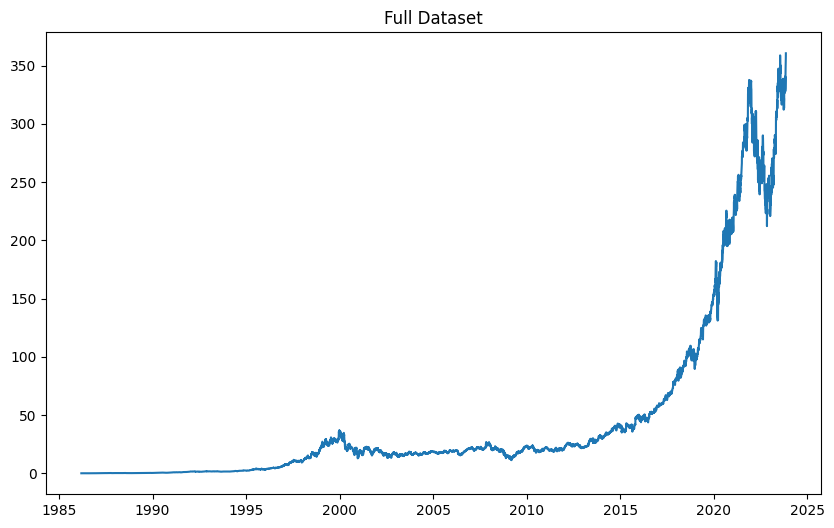

In [ ]:
# Full graph Dataset.

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df.index, df["Price"])
plt.title("Full Dataset")
plt.show()

Therefore, we will adopt a windowing methodology to facilitate the transformation of the forecasting problem into a supervised learning framework.

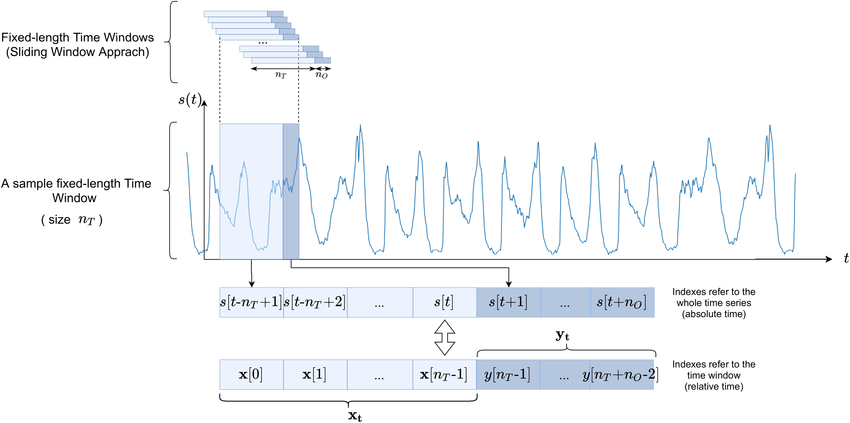

Defining a 5000-day segment within the Dataframe, isolating each consecutive 15 days for the model input, and designating the following day (16th day) as the output variable.

In [4]:
# Choose the amount of days to consider from the dataset
days = 5000 # ~14 years

# numbers of days to consider as the input of the model
lookback = 15


def df_to_windowed(fullDF, n=lookback, daysSelected=days):
    """
    Create a windowed Dataframe (converting into a supervised problem).
    Therefore, the last {lookback} days prices will be the (input)
    and will generate the next day price (output)
    """

    tmp_df = pd.DataFrame()
    for i in range(n, 0, -1):
        tmp_df[f"Last-{i} Price"] = fullDF["Price"].shift(periods=i)
    tmp_df["Price"] = fullDF["Price"]

    return tmp_df.dropna()[-daysSelected:]


windowed_df = df_to_windowed(df)

In [5]:
windowed_df

Last-15 Price  Last-14 Price  Last-13 Price  Last-12 Price  \
Date                                                                     
2003-12-29      16.282078      16.445030      16.532766      16.664377   
2003-12-30      16.445030      16.532766      16.664377      16.676914   
2003-12-31      16.532766      16.664377      16.676914      16.701979   
2004-01-02      16.664377      16.676914      16.701979      16.758381   
2004-01-05      16.676914      16.701979      16.758381      16.958931   
...                   ...            ...            ...            ...   
2023-11-01     332.420013     331.160004     327.730011     332.640015   
2023-11-02     331.160004     327.730011     332.640015     332.059998   
2023-11-03     327.730011     332.640015     332.059998     330.109985   
2023-11-06     332.640015     332.059998     330.109985     331.320007   
2023-11-07     332.059998     330.109985     331.320007     326.670013   

            Last-11 Price  Last-10 Price  Last-9 Price  Last-8 Price  \
Date                                                                   
2003-12-29      16.676914      16.701979     16.758381     16.958931   
2003-12-30      16.701979      16.758381     16.958931     16.946400   
2003-12-31      16.758381      16.958931     16.946400     17.172014   
2004-01-02      16.958931      16.946400     17.172014     17.146950   
2004-01-05      16.946400      17.172014     17.146950     17.034134   
...                   ...            ...           ...           ...   
2023-11-01     332.059998     330.109985    331.320007    326.670013   
2023-11-02     330.109985     331.320007    326.670013    329.320007   
2023-11-03     331.320007     326.670013    329.320007    330.529999   
2023-11-06     326.670013     329.320007    330.529999    340.670013   
2023-11-07     329.320007     330.529999    340.670013    327.890015   

            Last-7 Price  Last-6 Price  Last-5 Price  Last-4 Price  \
Date                                                                 
2003-12-29     16.946400     17.172014     17.146950     17.034134   
2003-12-30     17.172014     17.146950     17.034134     17.015335   
2003-12-31     17.146950     17.034134     17.015335     16.946400   
2004-01-02     17.034134     17.015335     16.946400     17.052935   
2004-01-05     17.015335     16.946400     17.052935     17.209623   
...                  ...           ...           ...           ...   
2023-11-01    329.320007    330.529999    340.670013    327.890015   
2023-11-02    330.529999    340.670013    327.890015    329.809998   
2023-11-03    340.670013    327.890015    329.809998    337.309998   
2023-11-06    327.890015    329.809998    337.309998    338.109985   
2023-11-07    329.809998    337.309998    338.109985    346.070007   

            Last-3 Price  Last-2 Price  Last-1 Price       Price  
Date                                                              
2003-12-29     17.015335     16.946400     17.052935   17.209623  
2003-12-30     16.946400     17.052935     17.209623   17.247215  
2003-12-31     17.052935     17.209623     17.247215   17.153221  
2004-01-02     17.209623     17.247215     17.153221   17.203354  
2004-01-05     17.247215     17.153221     17.203354   17.635786  
...                  ...           ...           ...         ...  
2023-11-01    329.809998    337.309998    338.109985  346.070007  
2023-11-02    337.309998    338.109985    346.070007  348.320007  
2023-11-03    338.109985    346.070007    348.320007  352.799988  
2023-11-06    346.070007    348.320007    352.799988  356.529999  
2023-11-07    348.320007    352.799988    356.529999  360.529999  

[5000 rows x 16 columns]

In [6]:
windowed_df["Price"].describe()

count    5000.000000
mean       80.652762
std        92.782729
min        11.327569
25%        20.142975
50%        30.797449
75%       102.435174
max       360.529999
Name: Price, dtype: float64

In [7]:
def split_xy(windowedNP):
    """
    Split np.array into X and y
    """

    X = windowedNP[:, :-1]
    y = windowedNP[:, -1]
    return (X, y)

## Standardization (Padronização)

Normalization: Stretching data to fit a fixed range box, such as (0,1) or (-1, 1). Handy for comparisons or picky algorithms, but cries if outliers mess up with the scale.

Standization (used): Tailoring data around the average, giving features equal weight and comparing to a standard bell curve, but also throws a tantrum if outliers mess up with its measurements. Both powerful tools, but keep those pesky outliers in check!

**Formula of Standardization:**

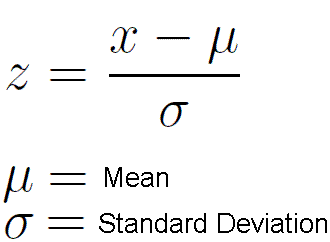

In [9]:
from sklearn.preprocessing import StandardScaler

def scale_data(train, vali, test):
    """ Get Scaled Data """ 
    
    scaler = StandardScaler()
    X_train, y_train = split_xy(scaler.fit_transform(train))
    X_vali, y_vali = split_xy(scaler.transform(vali))
    X_test, y_test = split_xy(scaler.transform(test))
    return scaler, [X_train, X_vali, X_test], [y_train, y_vali, y_test]

In [10]:
def descale_data(train, vali, test, pred, scaler):
    """ Get de-Scaled Data """ 
    X_train, y_train = split_xy(train.to_numpy())
    X_vali, y_vali = split_1xy(vali.to_numpy())
    X_test, y_test = split_xy(test.to_numpy())
    X_result, y_result = split_xy(scaler.inverse_transform(pred))
    return [y_train, y_vali, y_test, y_result]

# Models

## Theory

In [11]:
# Command to disable GPU:

# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Disable Tensorflow warnings,infos and errors
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

**1 Dimensional Convolution:**


<img src="Images/Convolution.gif" width="1000" align="center">

<img src="Images/Convolution+Padding.gif" width="1000" align="center">

**1D Max Pooling:**

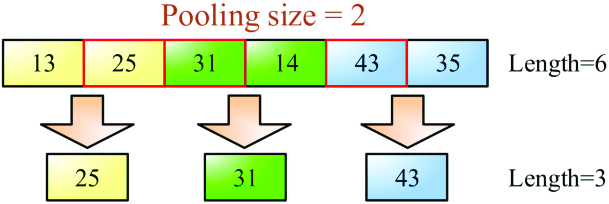

In [12]:
display.Image("Images/MaxPooling.png")

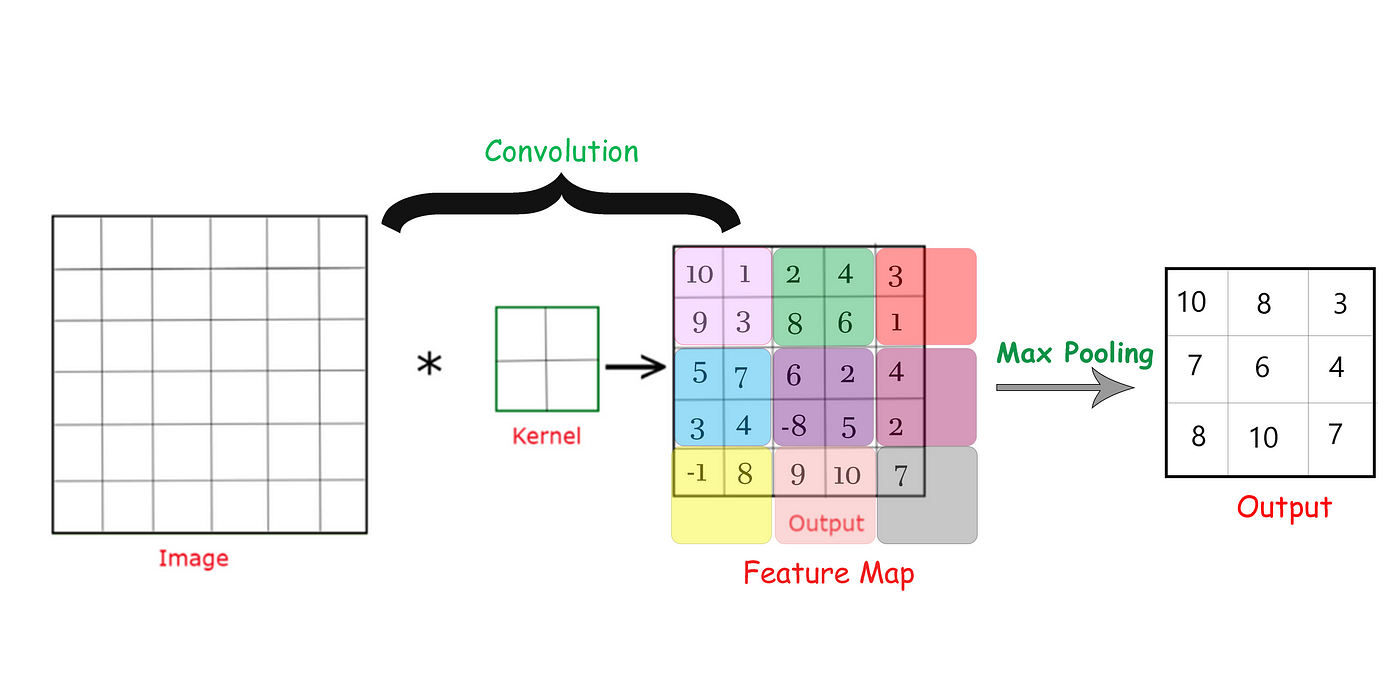

In [13]:
display.Image("Images/Conv+Max.png")

# Max_pooling aceita padding também!

**Long Short Term Memory (LSTM):**

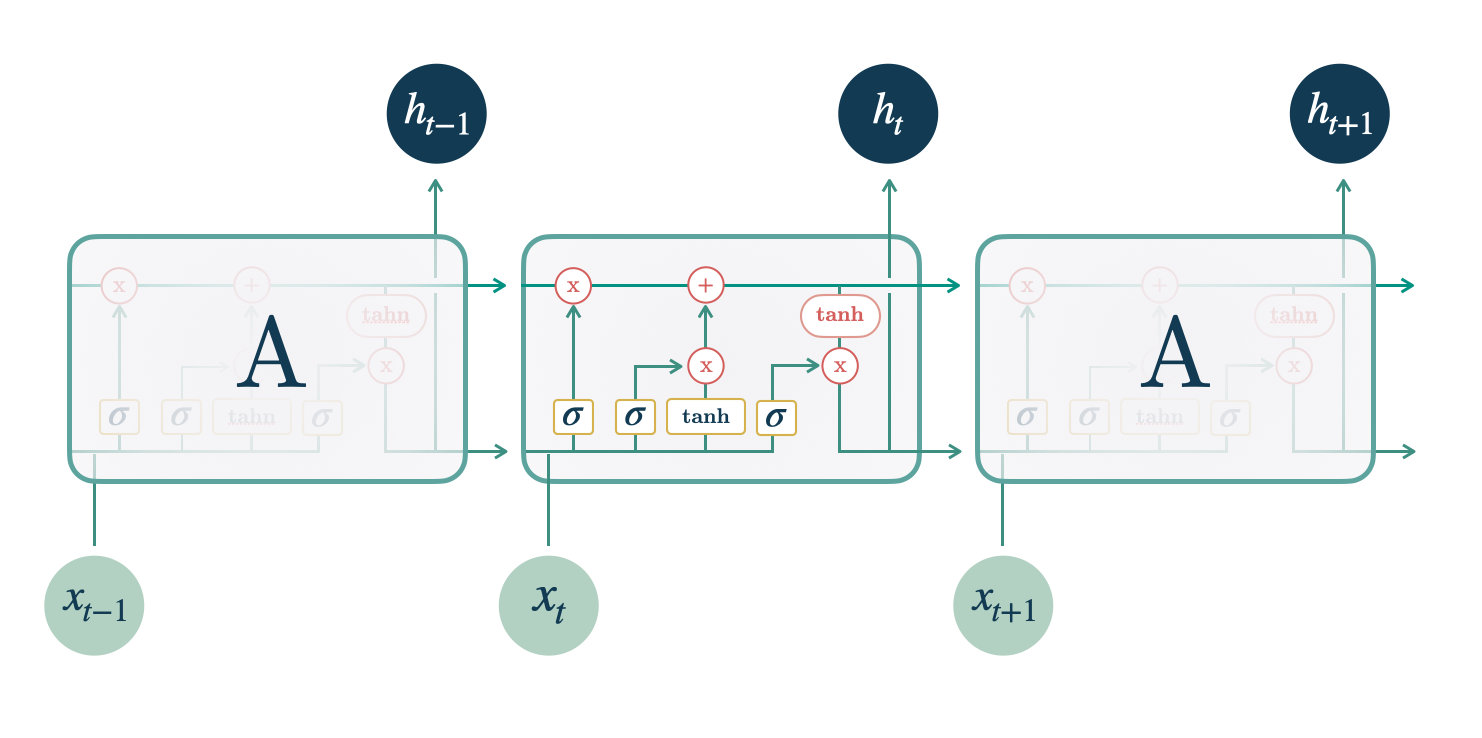

In [14]:
display.Image("Images/LSTM.png")

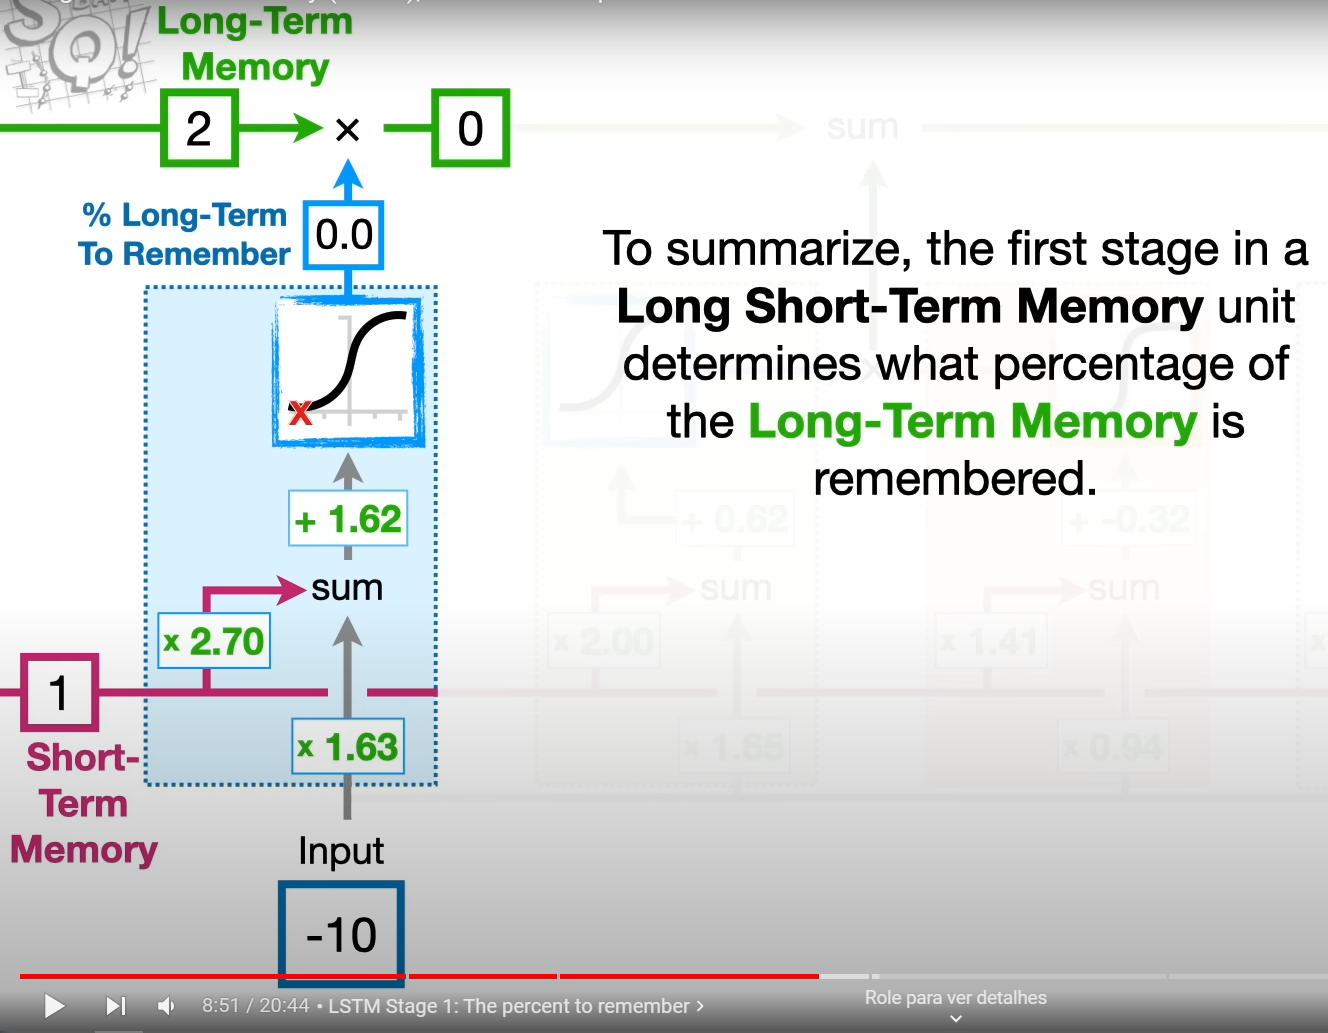

In [15]:
display.Image("Images/Forget_Gate.png")

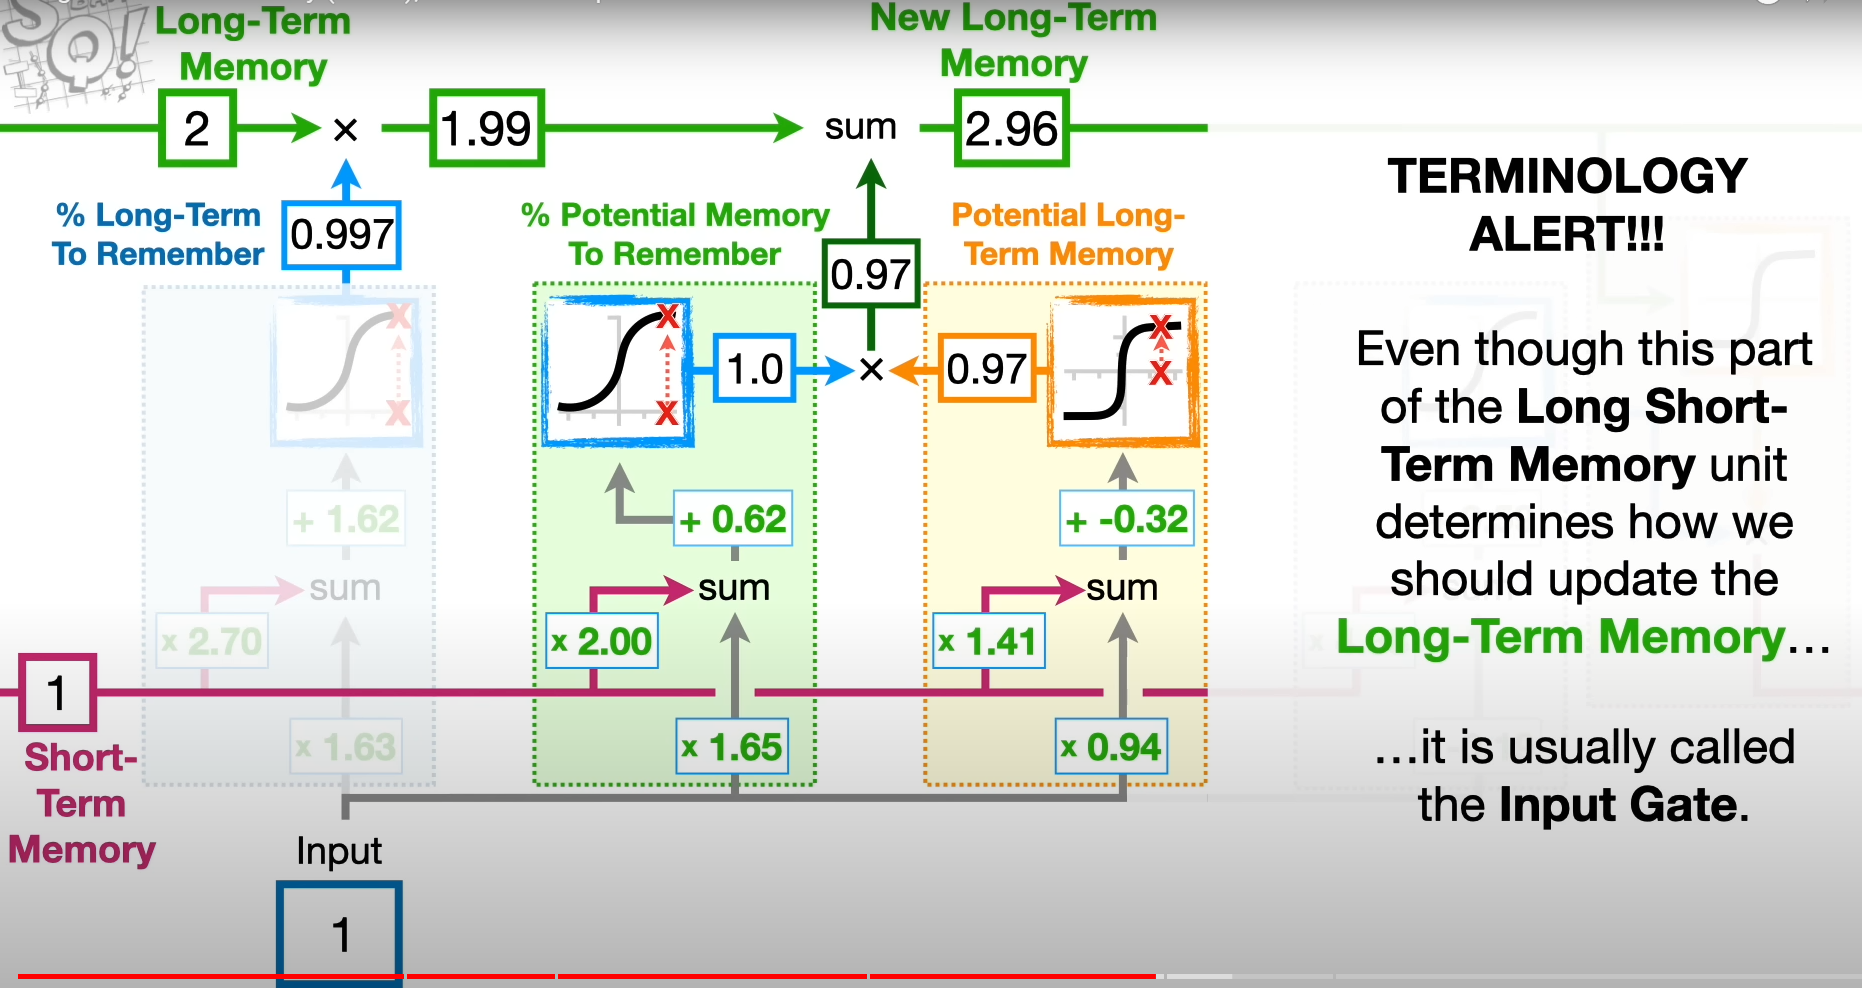

In [16]:
display.Image("Images/Input_Gate.png")

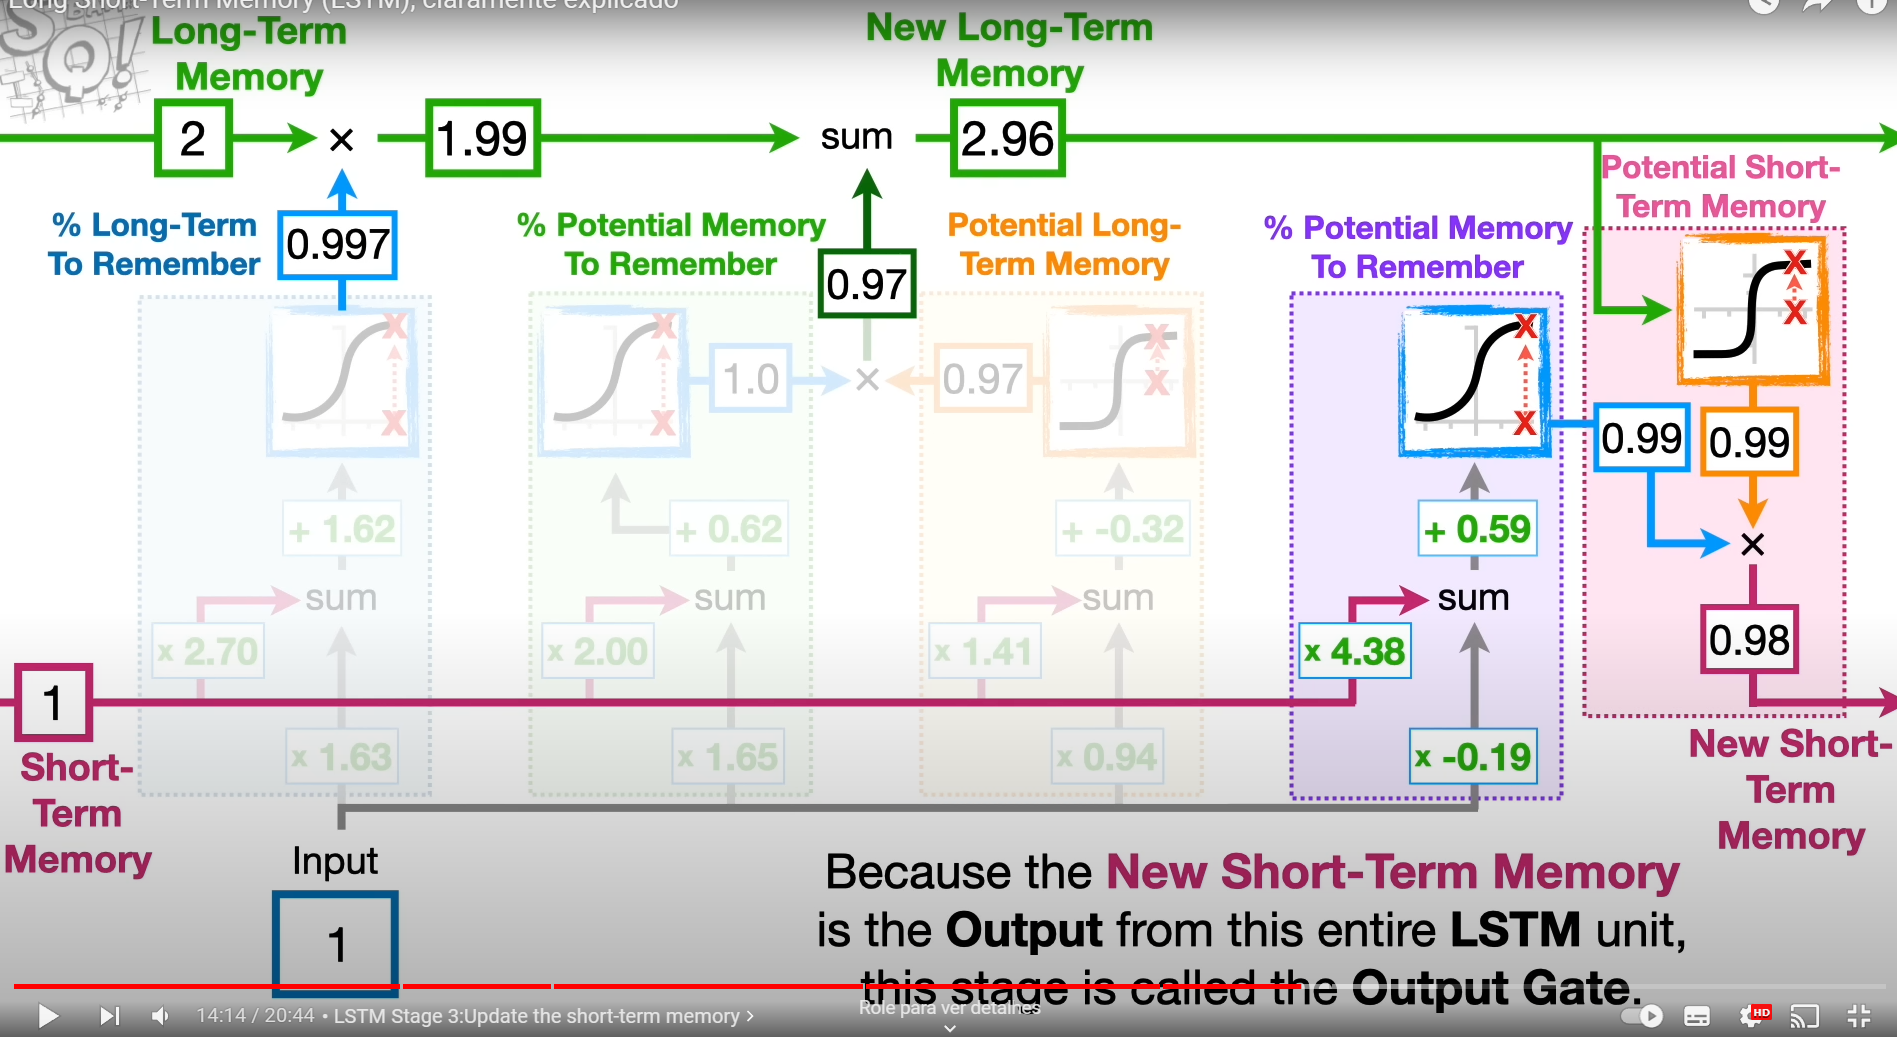

In [17]:
display.Image("Images/Output_Gate.png")

**Dropout Layer:**

<img src="Images/Dropout.gif" width="800" align="center">

## Best Models

*That survived my manual natural selection...*

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# model input: (last {lookback} days prices, 1 feature = "price")
models = []

In [19]:
models.append(
    Sequential([ # CNN+LSTM+Dropout
       layers.Input((lookback, 1)),
       layers.Conv1D(128, kernel_size=3, activation="relu", padding="same"),
       layers.MaxPooling1D(pool_size=2, padding="same"),
       layers.LSTM(128, return_sequences=True),
       layers.Flatten(),
       layers.Dropout(0.3),
       layers.Dense(128),
       layers.Dense(1)
    ]),
)
models[-1].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 15, 128)           512       
                                                                 
 max_pooling1d (MaxPooling1  (None, 8, 128)            0         
 D)                                                              
                                                                 
 lstm (LSTM)                 (None, 8, 128)            131584    
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                        

In [20]:
models.append(
    Sequential([ # LSTM+Dropout
        layers.Input((lookback, 1)),
        layers.LSTM(128, return_sequences=False),
        layers.Dropout(0.3),
        layers.Dense(128),
        layers.Dense(128),
        layers.Dense(1)
    ]),
)
models[-1].summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 99713 (389.50 KB)
Trainable params: 99713 (389.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
models.append(
    Sequential([ # CNN
        layers.Input((lookback, 1)),
        layers.Conv1D(128, kernel_size=3, activation="relu", padding="same"),
        layers.MaxPooling1D(pool_size=2, padding="same"),
        layers.Flatten(),
        layers.Dense(128),
        layers.Dense(1)
    ]),
)
models[-1].summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 15, 128)           512       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 8, 128)            0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 128)               131200    
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 131841 (515.00 KB)
Trainable params: 131841 (515.00 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [22]:
models.append(
    Sequential([ # Simple Neural Network
        layers.Input((lookback, 1)),
        layers.Flatten(),
        layers.Dense(128),
        layers.Dense(128),
        layers.Dense(1)
    ]),
)
models[-1].summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 15)                0         
                                                                 
 dense_7 (Dense)             (None, 128)               2048      
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18689 (73.00 KB)
Trainable params: 18689 (73.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model Training

## Auxilary Functions

In [23]:
# For each year, 60% train, 20% validation, 20% test
def sliding_window(windowed, trainSZ=2100, valiSZ=450, testSZ=450, step=20):
    """
    Sliding Window Generator
    """

    for i in range(0, len(windowed) - trainSZ - testSZ - valiSZ + 1, step):
        train_slice = windowed[i : i+trainSZ]
        vali_slice = windowed[i+trainSZ : i+trainSZ+valiSZ]
        test_slice = windowed[i+trainSZ+valiSZ : i+trainSZ+valiSZ+testSZ]
        yield (train_slice, vali_slice, test_slice)

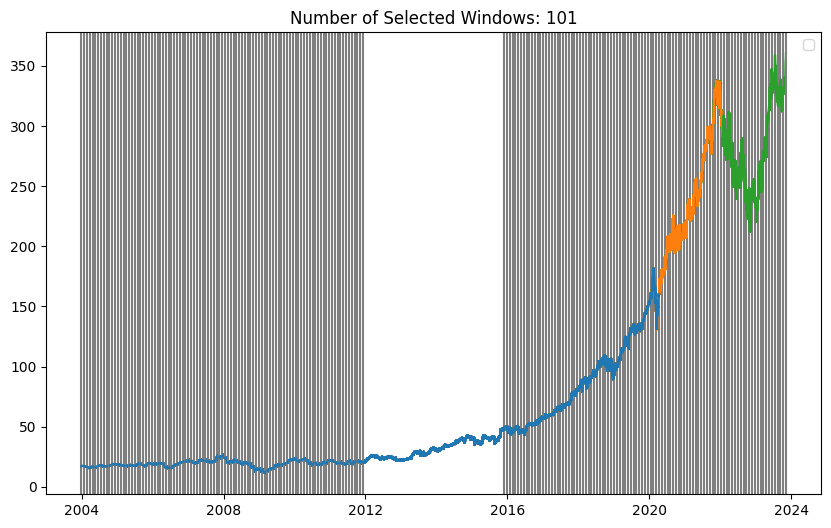

In [64]:
windows_list = list(sliding_window(windowed_df))
windows_cnt = len(windows_list)

plt.figure(figsize=(10,6))
plt.title(f"Number of Selected Windows: {windows_cnt}")
plt.legend([
    "Training Observations",
    "Validation Observations",
    "Testing Observations",
])
for train, vali, test in windows_list:
    plt.axvline(train.index[0], color="tab:gray")
    plt.plot(train.index, train["Price"], color="tab:blue")
    plt.plot(vali.index, vali["Price"], color="tab:orange")
    plt.plot(test.index, test["Price"], color="tab:green")
    plt.axvline(test.index[-1], color="tab:gray")

plt.show()

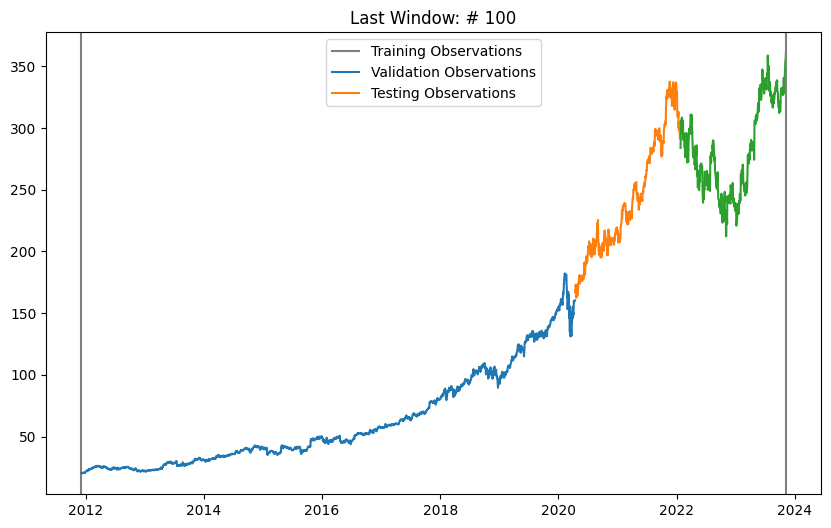

In [66]:
plt.figure(figsize=(10,6))
train, vali, test = windows_list[-1]
plt.axvline(train.index[0], color="tab:gray")
plt.plot(train.index, train["Price"], color="tab:blue")
plt.plot(vali.index, vali["Price"], color="tab:orange")
plt.plot(test.index, test["Price"], color="tab:green")
plt.axvline(test.index[-1], color="tab:gray")
plt.title(f"Last Window: # {windows_cnt-1}")
plt.legend([
    "Training Observations",
    "Validation Observations",
    "Testing Observations",
])
plt.show()

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix

def compute_accuracy_and_cm(y_val, y_test, y_pred):
    """
    Computes the accuracy score and the confusion matrix
    For simplicity, zero price change are considered as positive
    """

    sz = len(y_test)
    y_ref = np.append(y_val[-1], y_test)
    
    y_test_label = np.zeros(sz)
    y_pred_label = np.zeros(sz)

    acc = 0
    for i in range(sz):
        y_test_label[i] = 1 if ((y_test[i] - y_ref[i]) >= 0) else -1
        y_pred_label[i]  = 1 if ((y_pred[i] - y_ref[i]) >= 0) else -1

        if y_test_label[i] == y_pred_label[i]:
            acc += 1

    cm = confusion_matrix(y_true=y_test_label, y_pred=y_pred_label)
    return acc/sz, cm

In [26]:
from matplotlib import patches
patienceSelected = 50

def plot_loss_curve(history, model_idx, i, patience=patienceSelected):
    """
    Plots the loss curve for the model fitting process
    """
    
    logs = history.history
    aux_list = [(val, i) for i, val in enumerate(logs['combine_metric'])]
    best = min(aux_list)
    last = len(logs['combine_metric'])

    plt.figure(figsize=(10,6))
    plt.title(f"Loss Curve for: Model {model_idx}, Window {i}")
    plt.plot(logs["loss"], label="Training Loss")
    plt.plot(logs["val_loss"], label="Validation Loss")
    plt.plot(logs["combine_metric"], label="Combined Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")

    plt.axvline(last-1, color="tab:gray", ymax=0.3, linestyle='--')
    plt.axvline(last-patience-1, color="tab:gray", ymax=0.3, linestyle='--')
    plt.axvline(best[1], color="tab:red", ymax=0.3, linestyle='--')
    
    red_patch = patches.Patch(
        color="tab:red", 
        label=f"best epoch={best[1]}")
    
    gray_patch = patches.Patch(
        color="tab:gray", 
        label=f"Early Stop Limits ({last-patience-1}, {last-1})")

    handles, labels = plt.gca().get_legend_handles_labels()
    handles.extend([red_patch, gray_patch])

    plt.legend(handles=handles, loc="upper right")
    plt.show()

In [27]:
def plot_predictions(dates, ys, metrics, model_idx, i):
    """
    Plots the predicted curve, comparing with observation data
    """
    
    dates_train, dates_vali, dates_test = dates
    y_train, y_vali, y_test, y_result = ys
    rmse, mae, mape, r2, acc = metrics
    
    plt.figure(figsize=(10,6))
    plt.plot(dates_train, y_train)
    plt.plot(dates_vali, y_vali)
    plt.plot(dates_test, y_test)
    plt.plot(dates_test, y_result)
    plt.legend([
        "Training Observations",
        "Validation Observations",
        "Testing Observations",
        "Testing Predictions"
    ])
    plt.title(f"Model {model_idx}, Window {i} \n \
              RMSE={rmse:.3f}, MAE={mae:.3f}, MAPE={mape:.3f}, R2={r2:.3f}" )
    plt.show()

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix(cm, metrics, model_idx, i):
    """
    Plots the confusion matrix for the price change classification
    """

    rmse, mae, mape, r2, acc = metrics

    cm_plt = ConfusionMatrixDisplay(cm, 
                                    display_labels=["Positive", "Negative"])
    cm_plt.plot()
    cm_plt.ax_.set(
        title= f"Model {model_idx}, Window {i}, Accuracy={acc:.3f}",
        xlabel= "Predicted Price Change",
        ylabel= "Actual Price Change"
    )
    plt.show()

### Creating important callbacks that will be used in the model training to avoid overfitting and also redundant longer training:

In [29]:
from keras.callbacks import EarlyStopping , Callback, ModelCheckpoint
import h5py 

class CombineCallback(Callback):
    def __init__(self, **kargs):
        super(CombineCallback, self).__init__(**kargs)
    def on_epoch_end(self, epoch, logs={}):
        f = 0.2 # f=vali_factor, 80% training loss, 20% validation loss
        logs['combine_metric'] = f*logs['val_loss']+(1-f)*logs['loss']

combined_cb = CombineCallback()
model_checkpoint = ModelCheckpoint(
    filepath="Models/tmp_best_model.h5", 
    monitor="combine_metric", 
    mode="min", 
    save_best_only=True, 
    save_weights_only=True,
    verbose=False
)
earlyStop = EarlyStopping(monitor="combine_metric", 
                          min_delta=0, 
                          patience=patienceSelected, 
                          mode="min", 
                          verbose=False)

## Main Function

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from tensorflow.keras.optimizers import Adam

def cross_validation(model, generator, model_idx, flag_plot=0):
    """
    Performs Cross validation for all models and all sliding windows

    Calculates the cross validation score:
        ("RMSE", "MAE", "MAPE", "R2", "Accuracy");

    Accuracy is computed by classifying if the relative price change 
    for day i was positive or negative
    """

    cv_score = pd.DataFrame(columns=["RMSE", "MAE", "MAPE", "R2", "Acc"])

    for i, (train, vali, test) in enumerate(generator):
        # Get Dates = [dates_train, dates_vali, dates_test]
        dates = [i.index for i in [train, vali, test]]

        # Scale data
        scaler, X_sc, y_sc = scale_data(train, vali, test)
        X_train_sc, X_vali_sc, X_test_sc = X_sc
        y_train_sc, y_vali_sc, y_test_sc = y_sc

        # Fit, save best model and Predict
        model.load_weights("Models/empty_model.h5", 
                           skip_mismatch=True, by_name=True)
        
        model.reset_states()
        history = model.fit(
            X_train_sc, y_train_sc,
            validation_data=(X_vali_sc, y_vali_sc),
            epochs=200, # maximum number of epochs
            batch_size=64, # better for jumping local minimas
            verbose=False,
            callbacks=[combined_cb, earlyStop, model_checkpoint]
        )
        model.load_weights("Models/tmp_best_model.h5",
                           skip_mismatch=True, by_name=True)
        
        preds_sc = model.predict(X_test_sc, verbose=False)

        # Descale data
        stacked_pred = np.hstack((X_test_sc, preds_sc))
        ys =  descale_data(train, vali, test, stacked_pred, scaler)
        [y_train, y_vali, y_test, y_result] = ys

        # Compute Metrics
        rmse = mean_squared_error(y_test, y_result, squared=False)
        mae = mean_absolute_error(y_test, y_result)
        mape = mean_absolute_percentage_error(y_test, y_result)
        r2 = r2_score(y_test, y_result)
        acc, cm = compute_accuracy_and_cm(y_vali, y_test, y_result)

        metrics = [rmse, mae, mape, r2, acc]

        # Plot All Curves and Metrics; Also loss curves
        if flag_plot == 2:
            plot_loss_curve(history, model_idx, i)
            plot_predictions(dates, ys, metrics, model_idx, i)
            plot_confusion_matrix(cm, metrics, model_idx, i)

        # Plot only 5 Curves and Metrics;
        elif (flag_plot == 1 and (i % (windows_cnt//5)) == 0):
            plot_loss_curve(history, model_idx, i)
            plot_predictions(dates, ys, metrics, model_idx, i)
            plot_confusion_matrix(cm, metrics, model_idx, i)

        # Append Result
        cv_score.loc[len(cv_score)] = metrics

    return cv_score

In [31]:
# For each model, perform a cross validation training,
# plot graphs and compute metrics if wanted
cv_scores = []

def run_model(model, i):
    """ 
    Creates the model with the selected architecture and empty weights,
    compile it with mse loss function and Adam optimizer
    and computes the cross validation results for this model
    """

    model.compile(
        loss="mean_squared_error",
        optimizer=Adam(learning_rate=0.0001)
    )   
    model.save_weights("Models/empty_model.h5")
    generator = sliding_window(windowed_df)
    cv_score = cross_validation(model, generator, i, 1)
    cv_scores.append(cv_score)

**Backpropagation Method:** *Adam Optimizer*

    "We propose Adam, a method for efficient stochastic optimization that only requires first-order gradients with little memory requirement. The method computes individual adaptive learning rates for
    different parameters from estimates of first and second moments of the gradients; the name Adam
    is derived from adaptive moment estimation. Our method is designed to combine the advantages
    of two recently popular methods: AdaGrad (Duchi et al., 2011), which works well with sparse gradients, and RMSProp (Tieleman & Hinton, 2012), which works well in on-line and non-stationary
    settings; 

    Some of Adam’s advantages are that the magnitudes of parameter updates are invariant to
    rescaling of the gradient, its stepsizes are approximately bounded by the stepsize hyperparameter,
    it does not require a stationary objective, it works with sparse gradients, and it naturally performs a
    form of step size annealing."

~Diederik P. Kingma, Jimmy Lei Ba (Authors)

<img src="Images/Adam.png" width="350" align="center">

**ADAM:** Adaptive moment estimation

*Adaptive momentum* and *adaptive learning rate* !!

<img src="Images/LearningStep.jpg" width="400" align="left">
<img src="Images/LargeVsSmall.jpg" width="520" align="right">

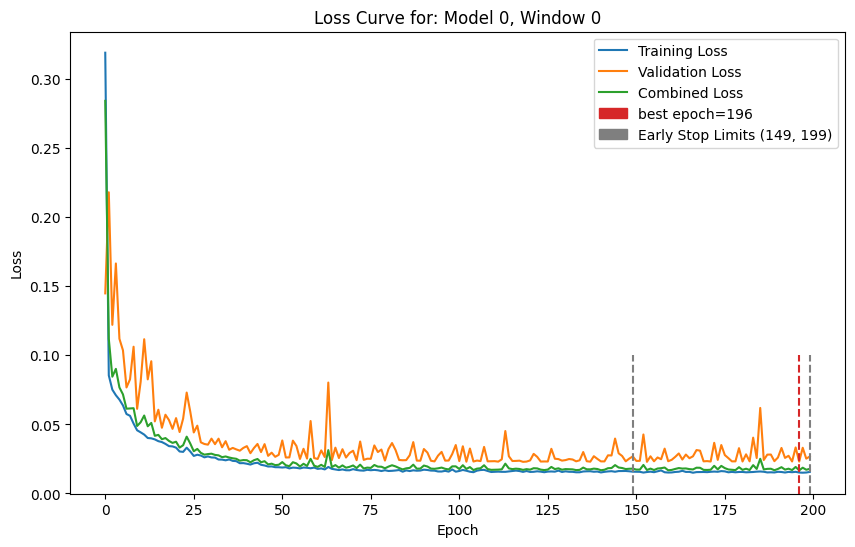

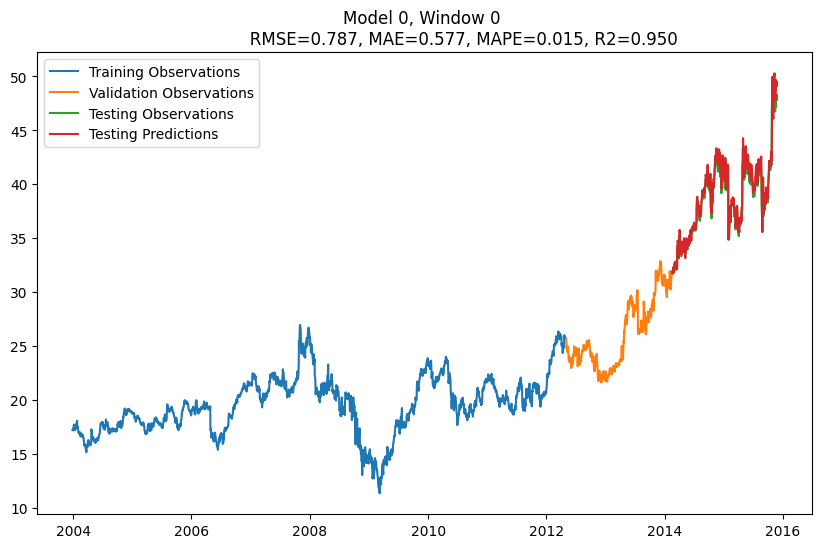

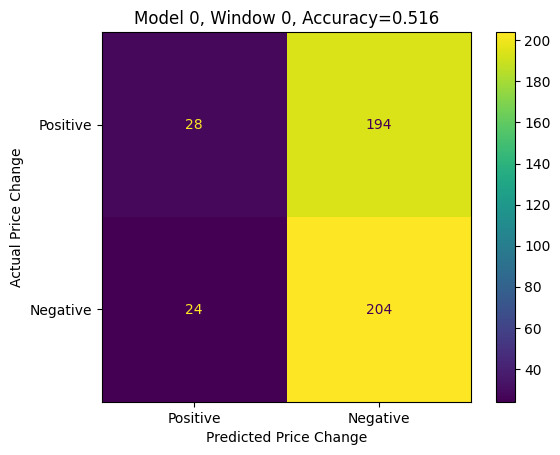

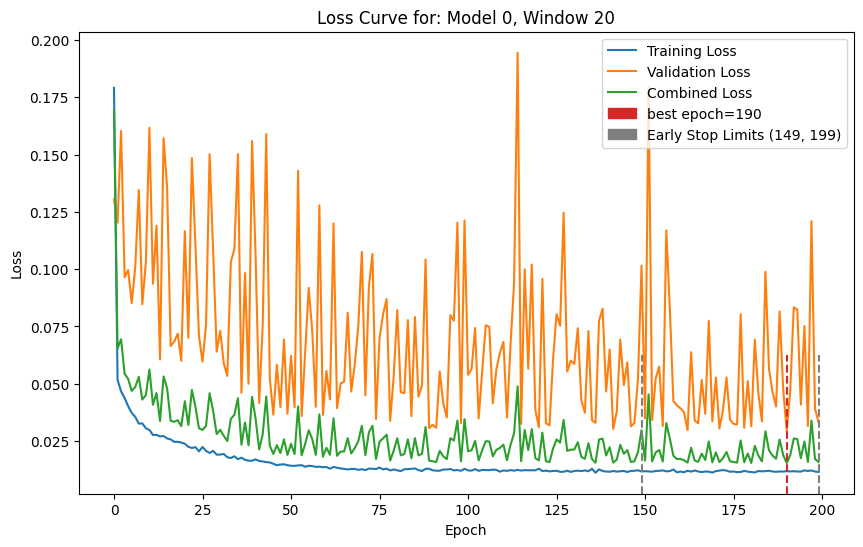

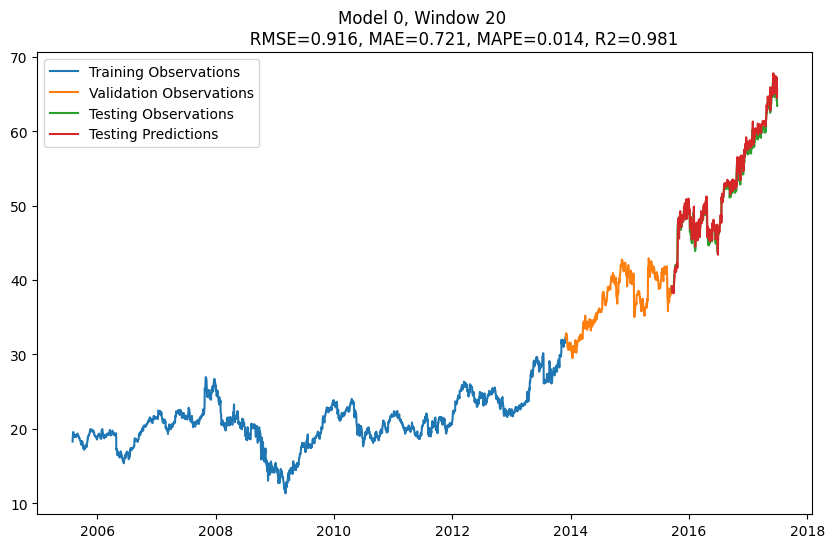

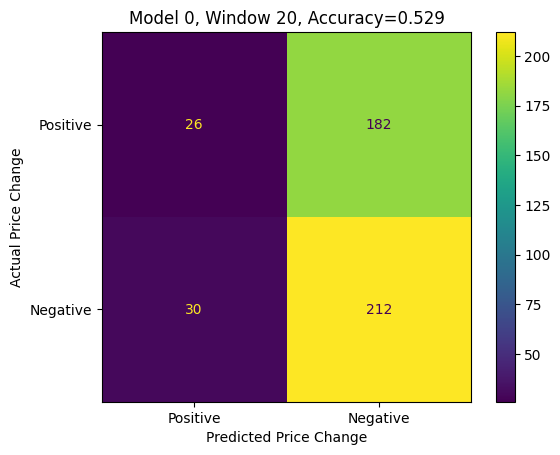

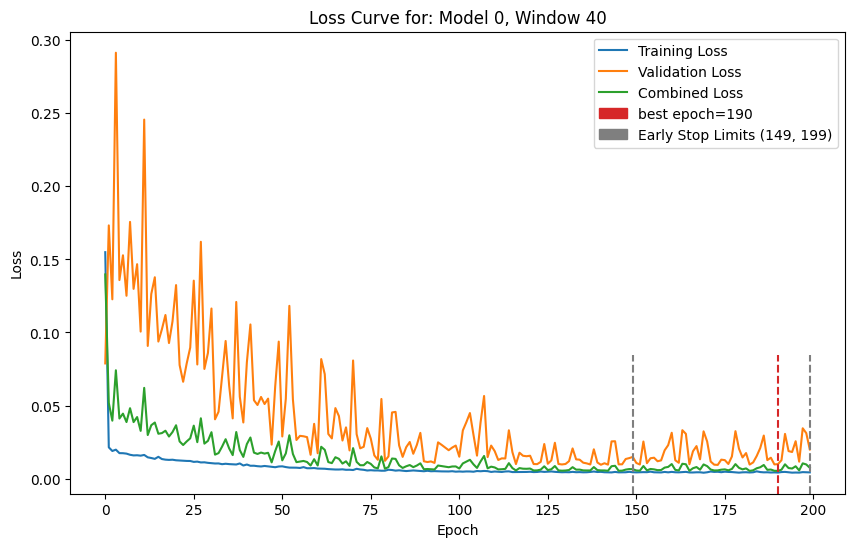

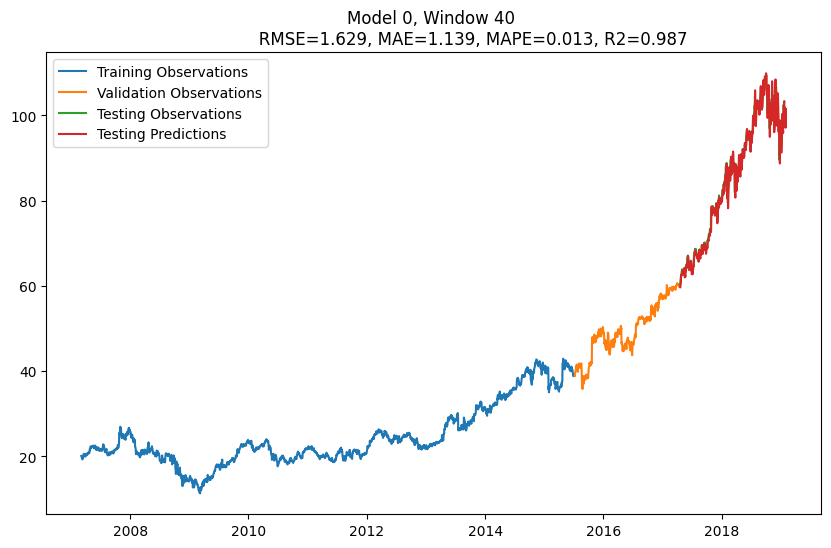

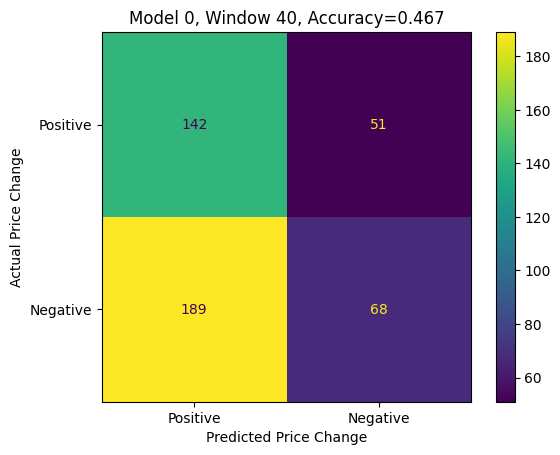

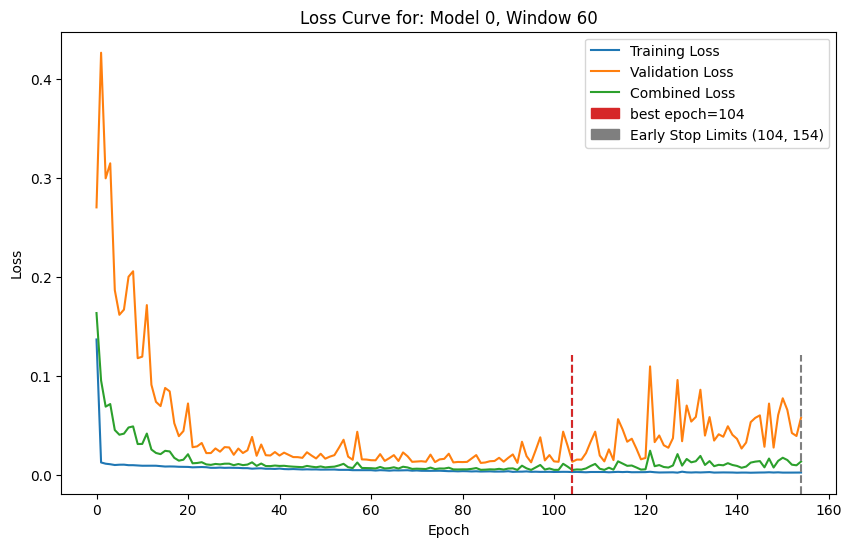

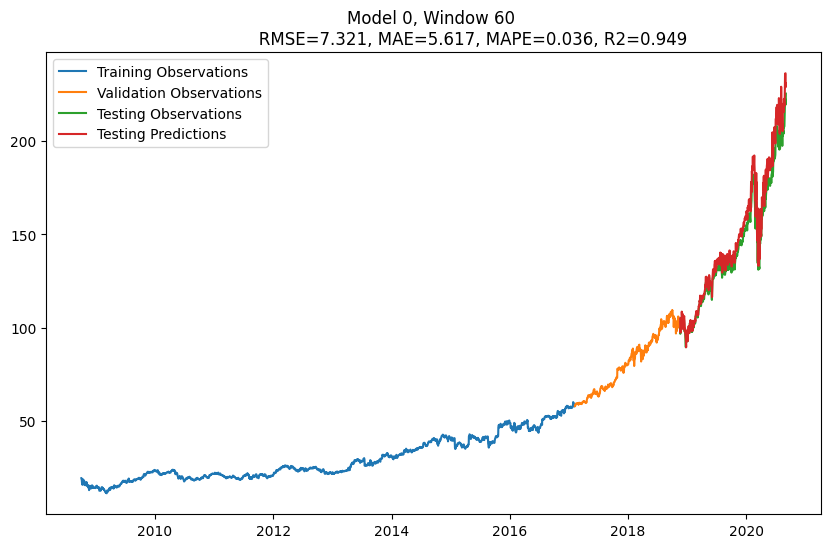

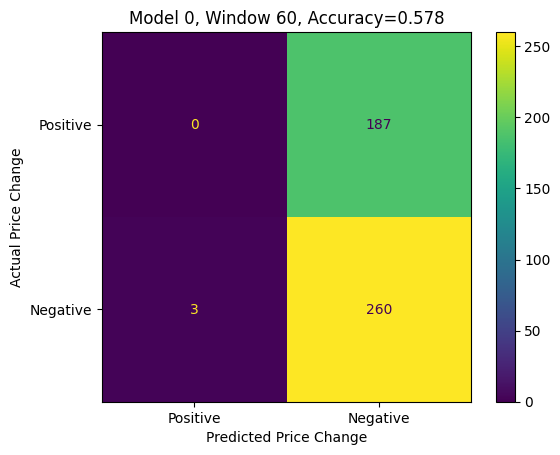

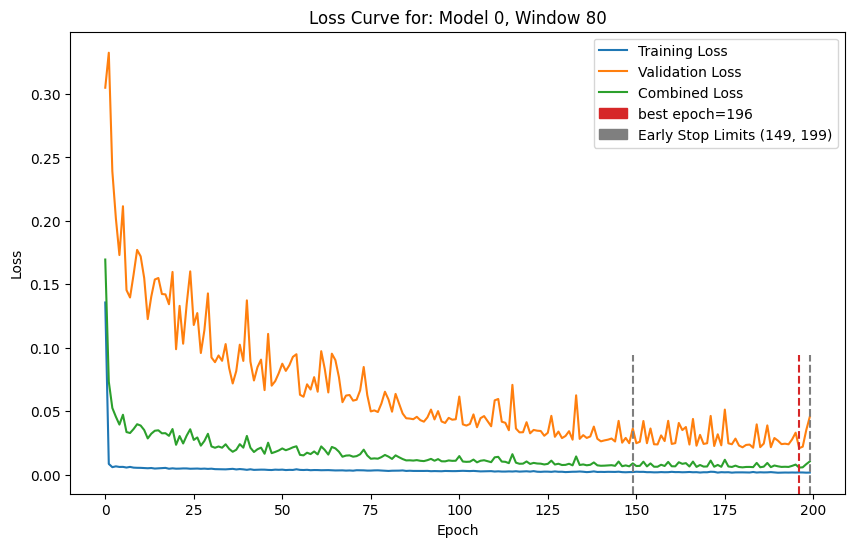

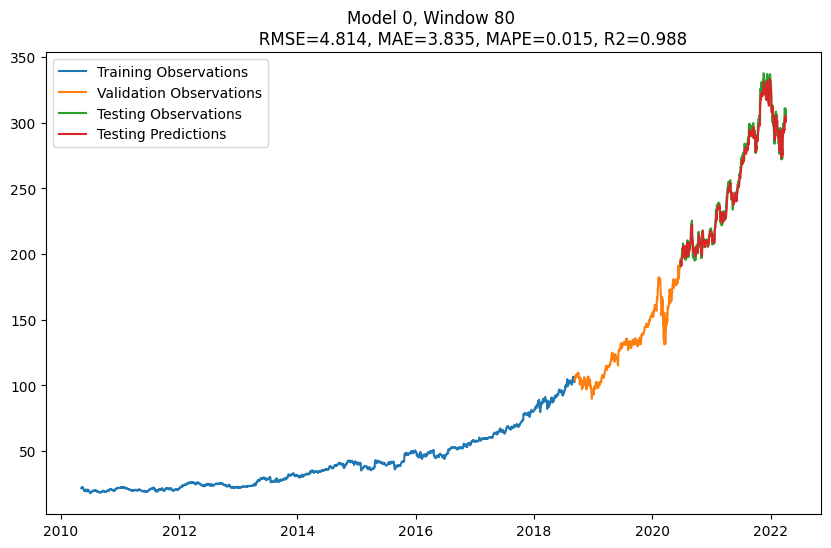

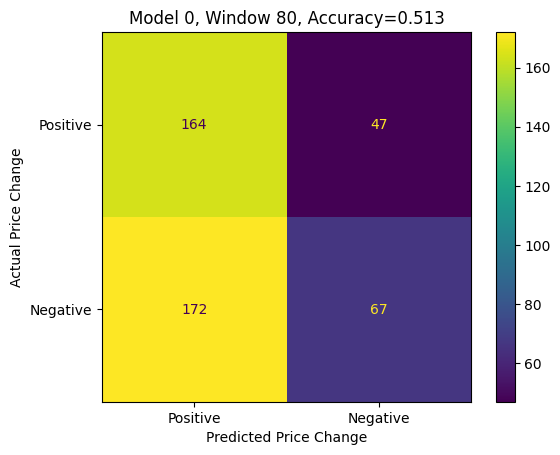

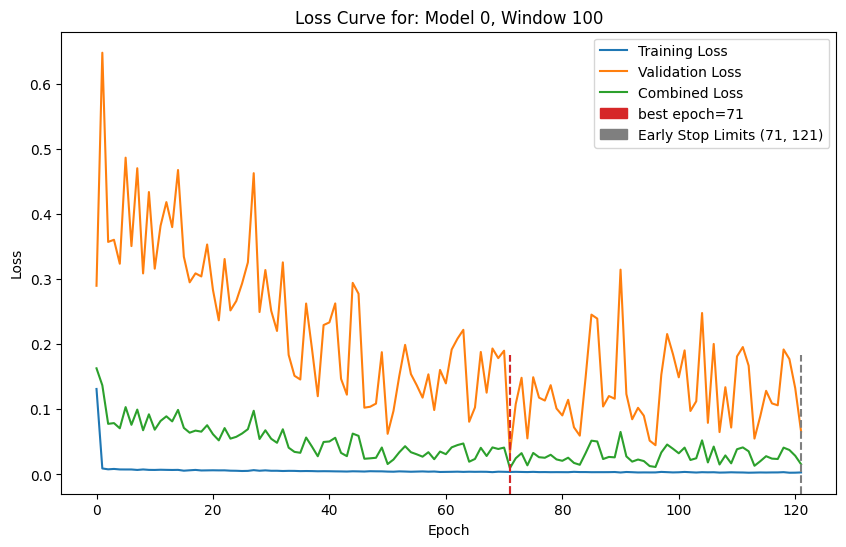

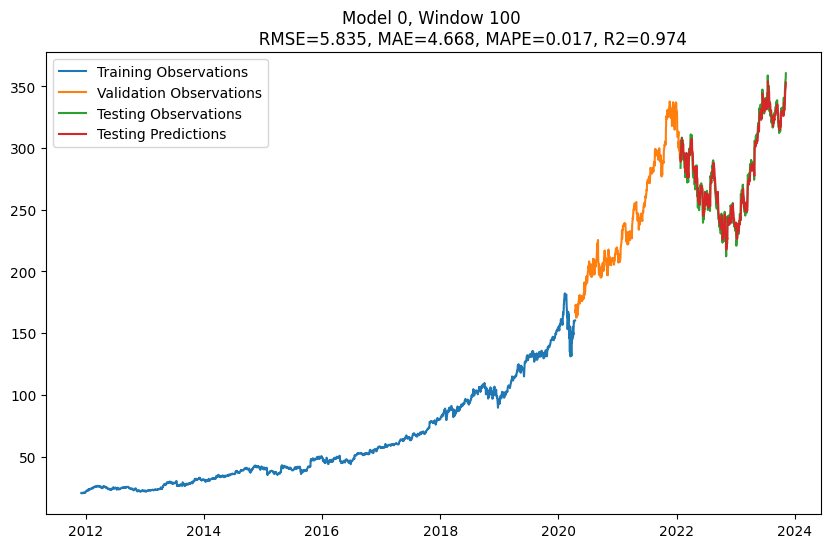

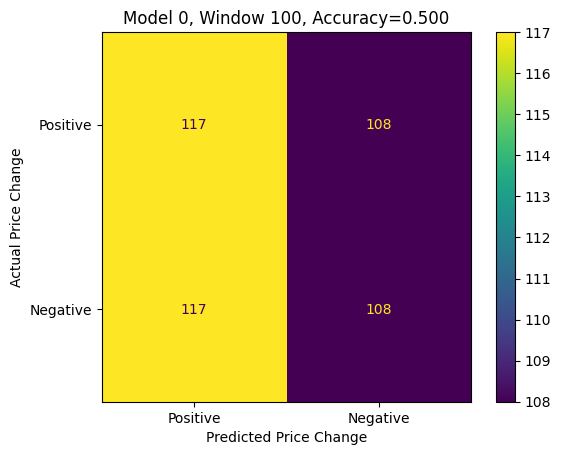

In [32]:
# CNN + LSTM + Dropout
run_model(models[0], 0)

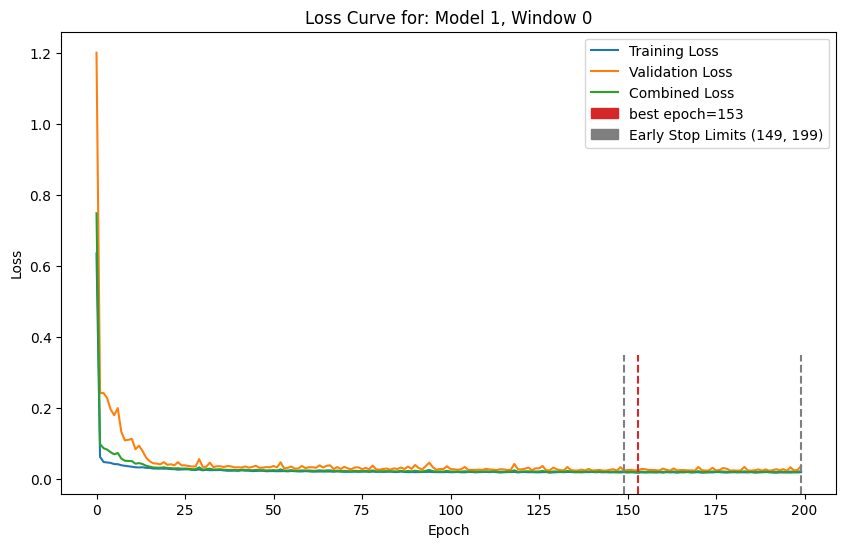

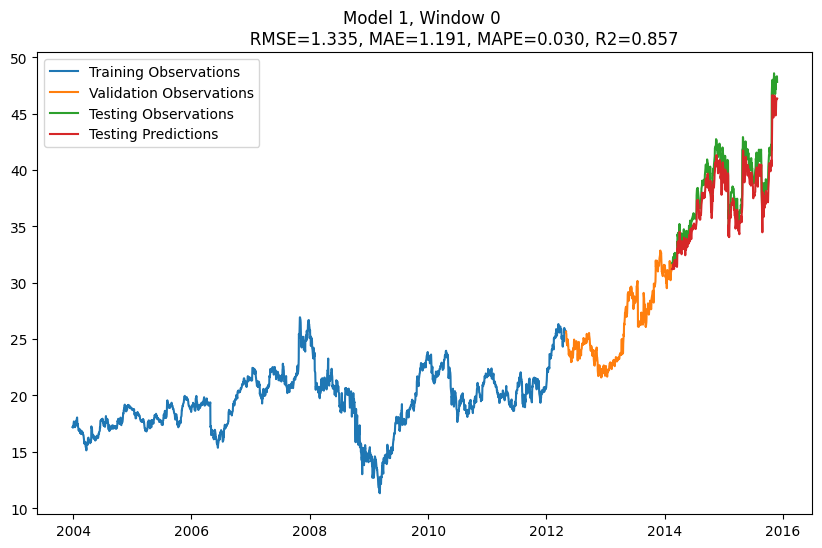

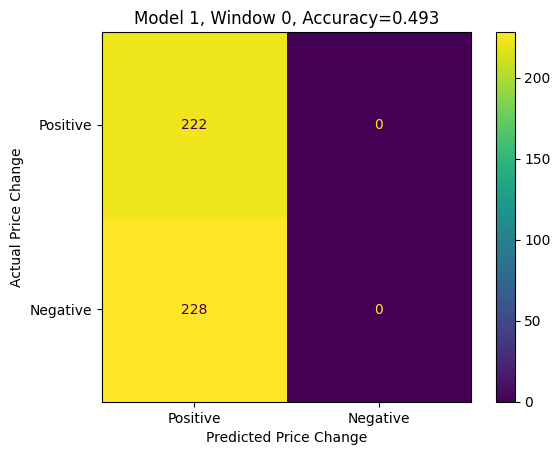

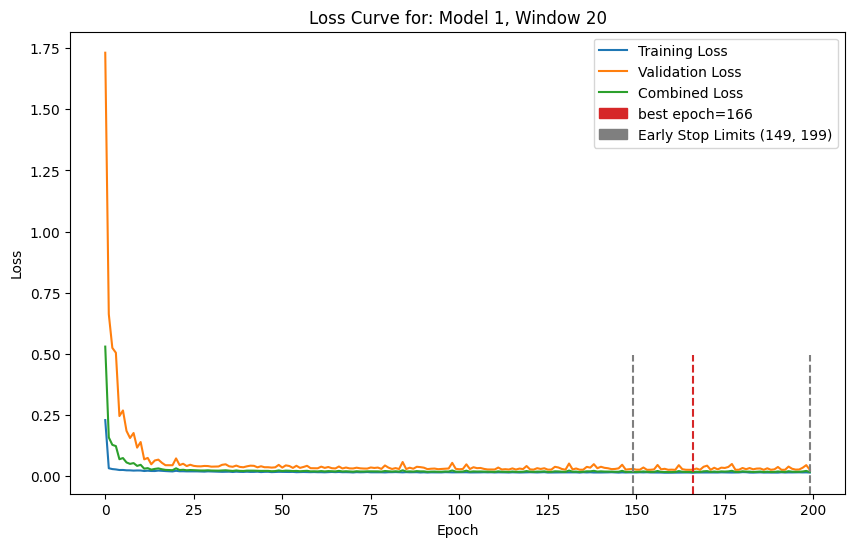

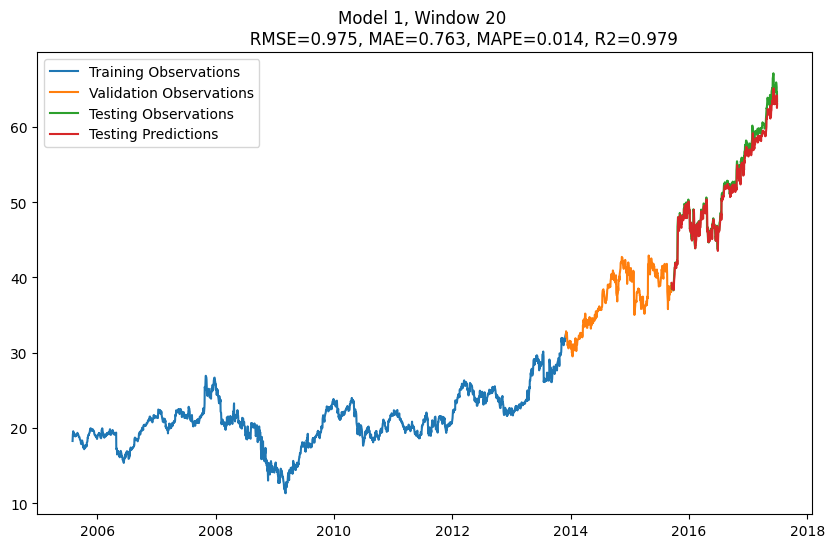

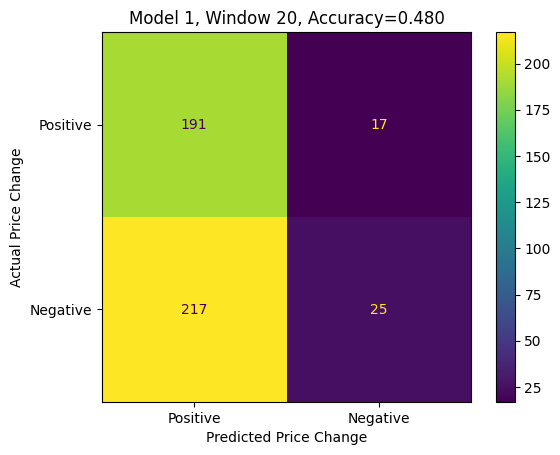

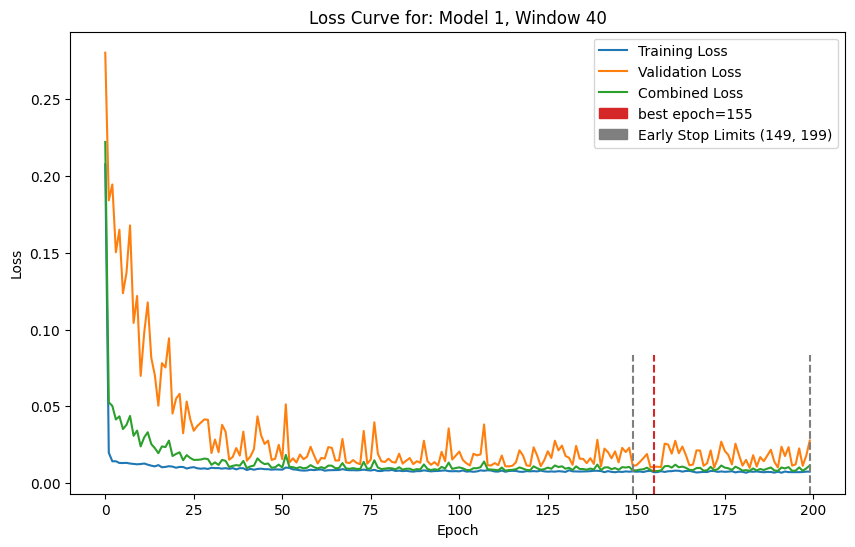

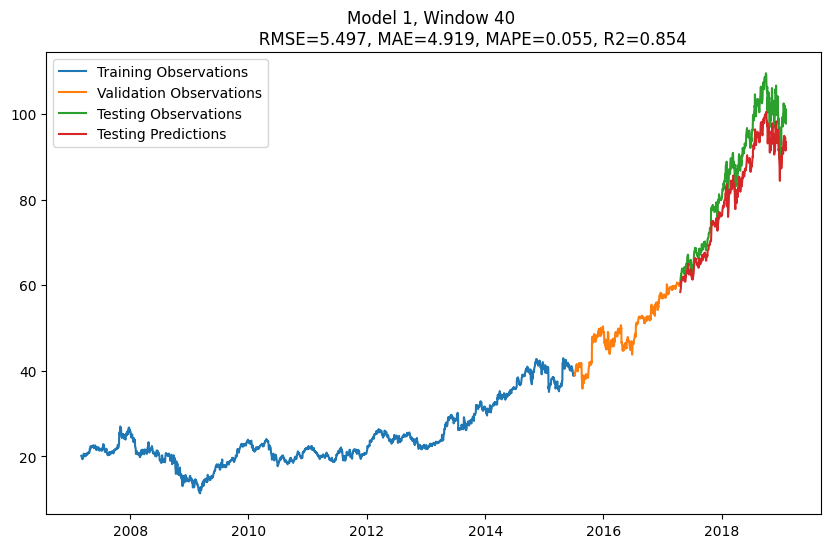

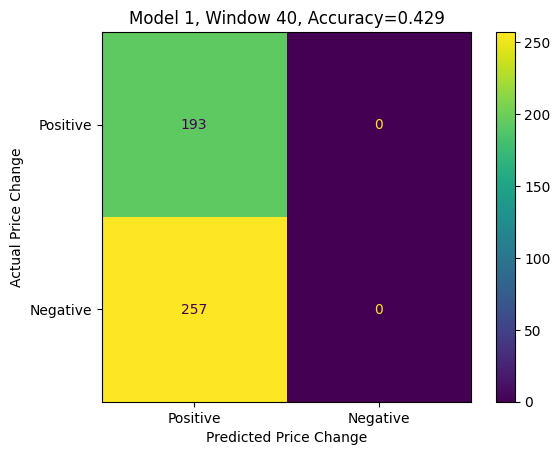

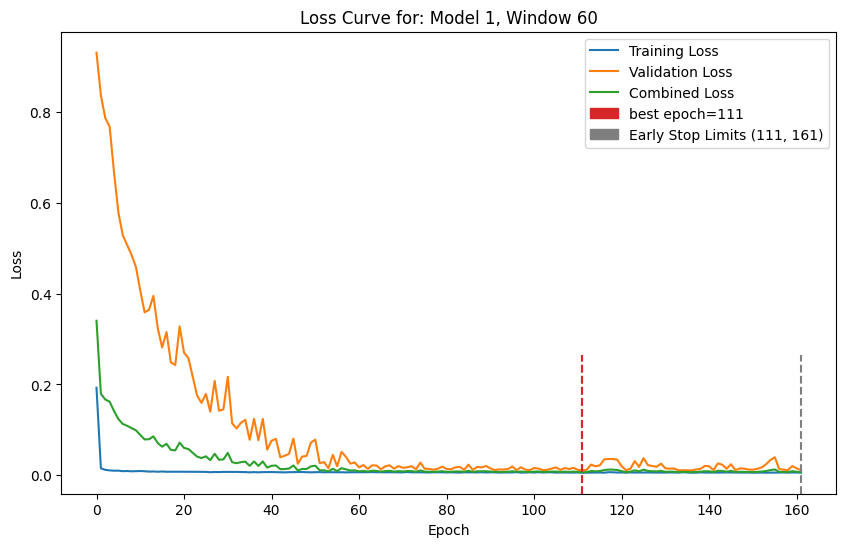

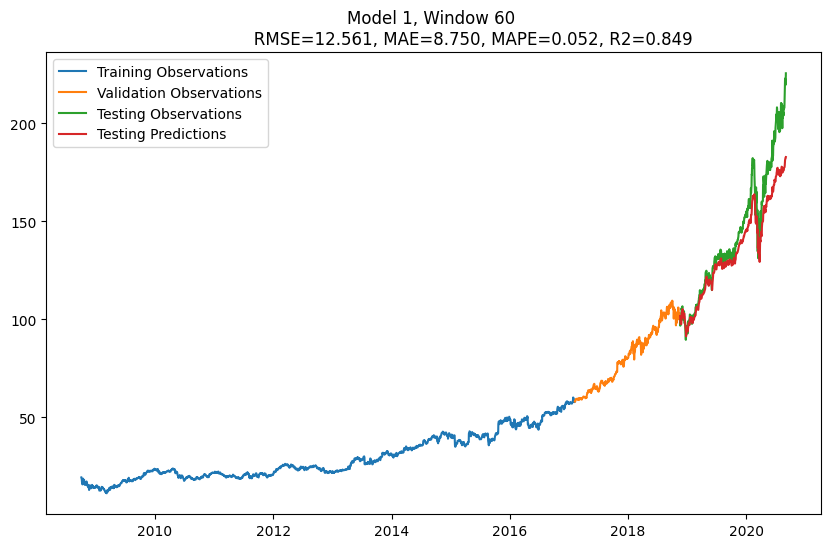

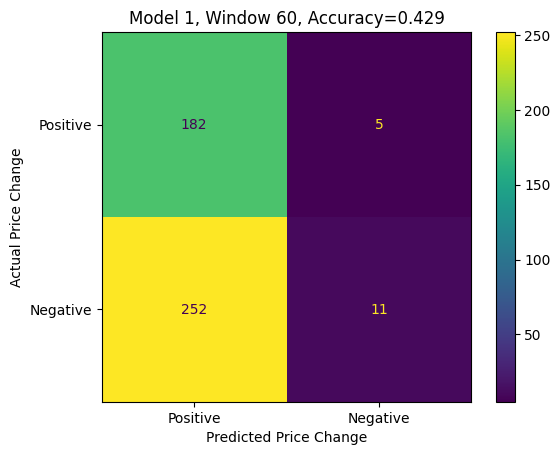

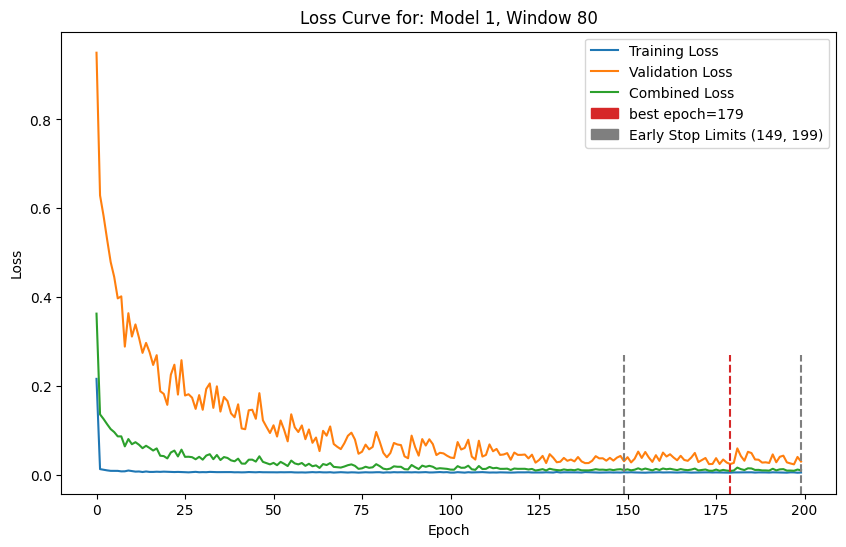

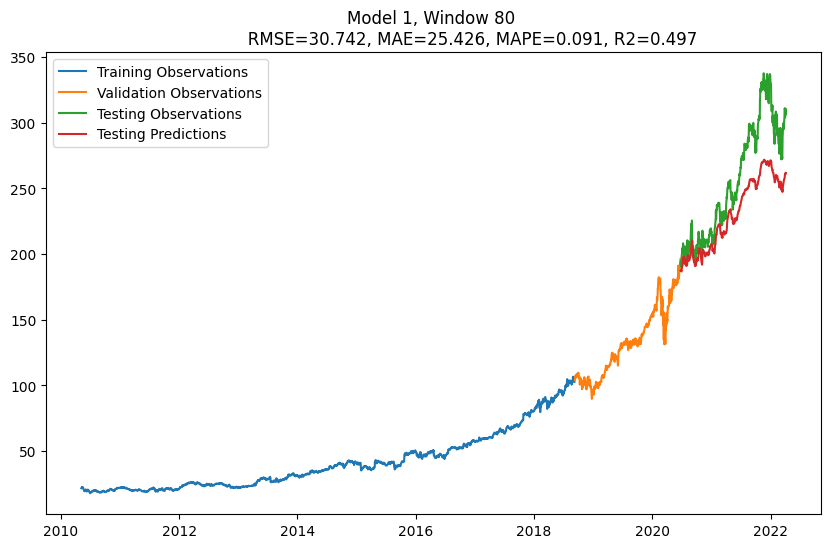

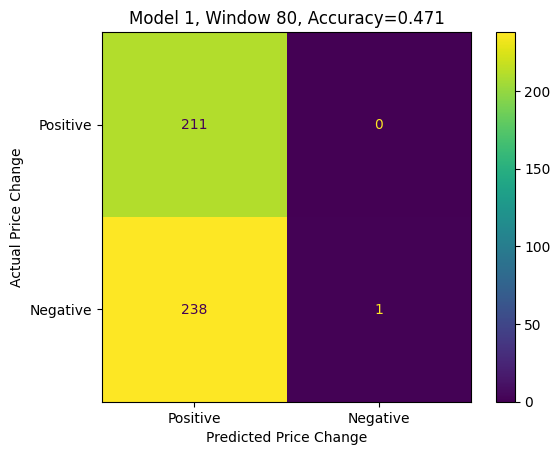

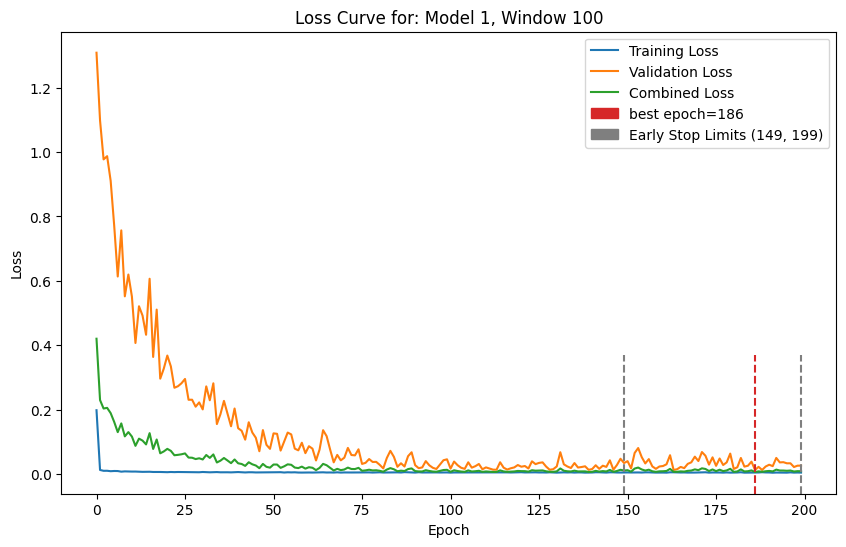

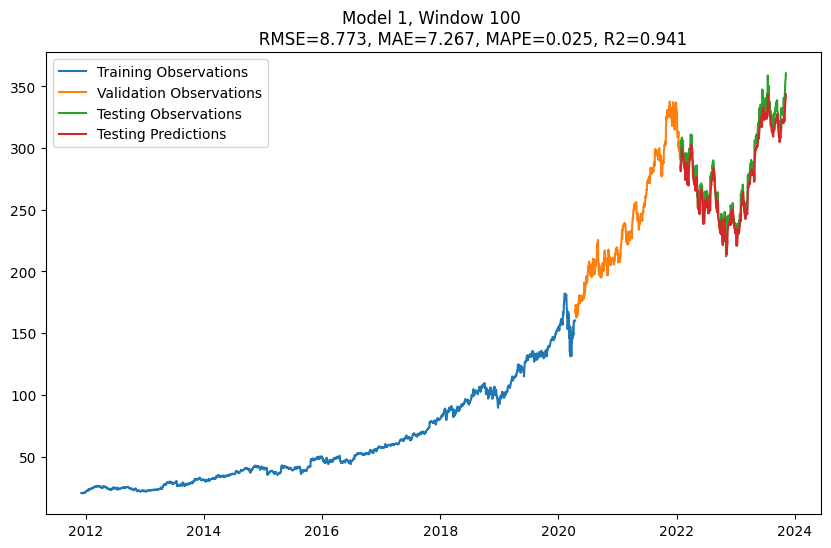

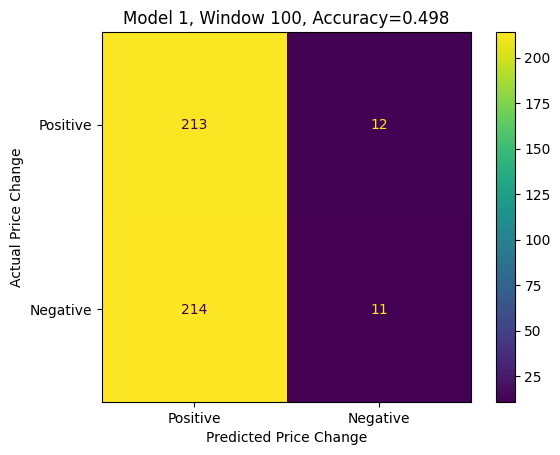

In [33]:
# LSTM + Dropout
run_model(models[1], 1)

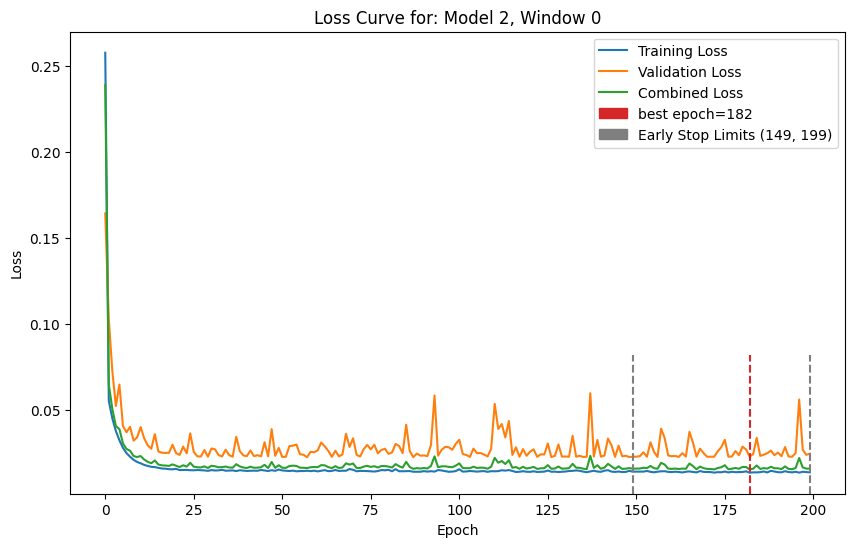

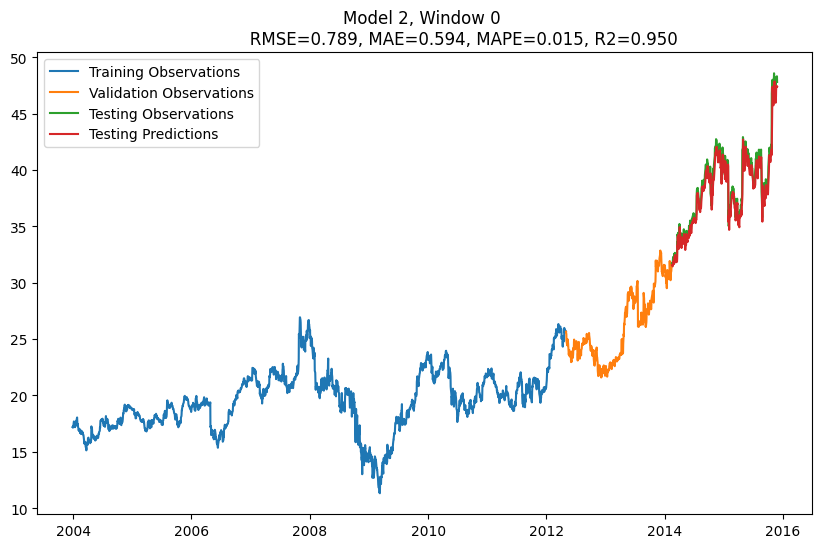

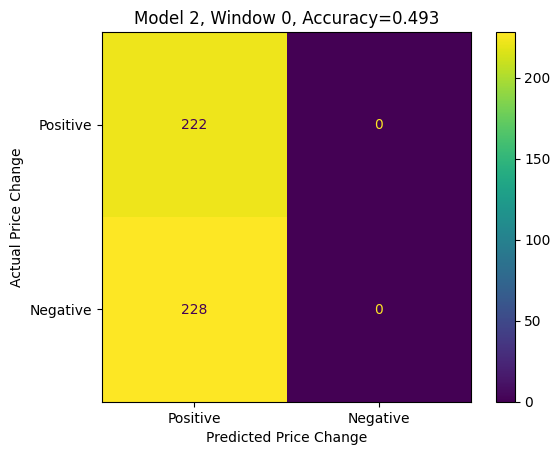

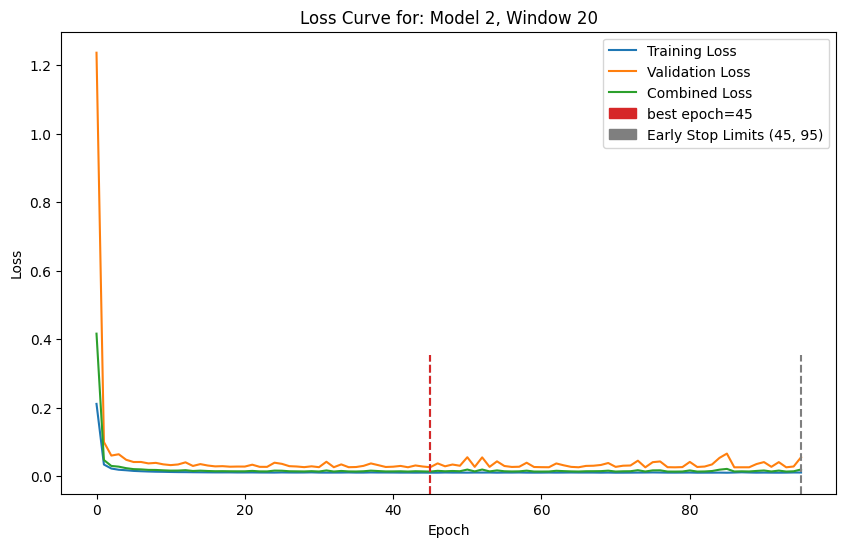

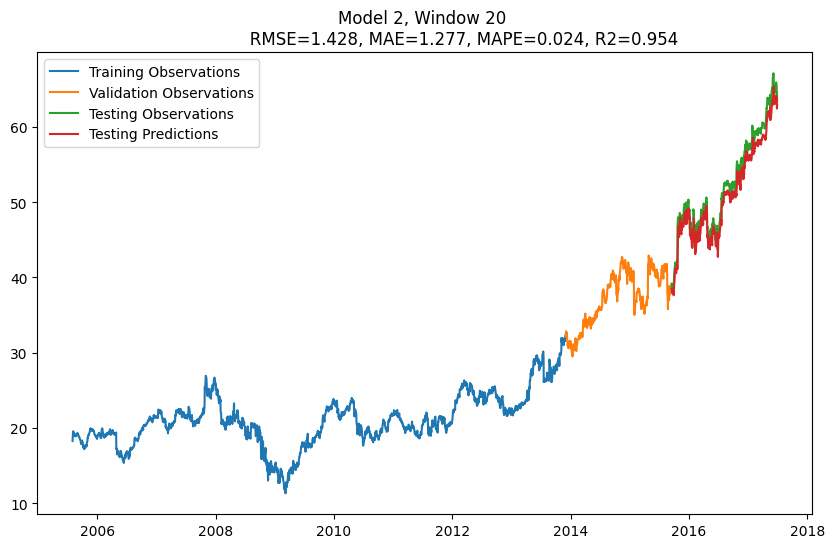

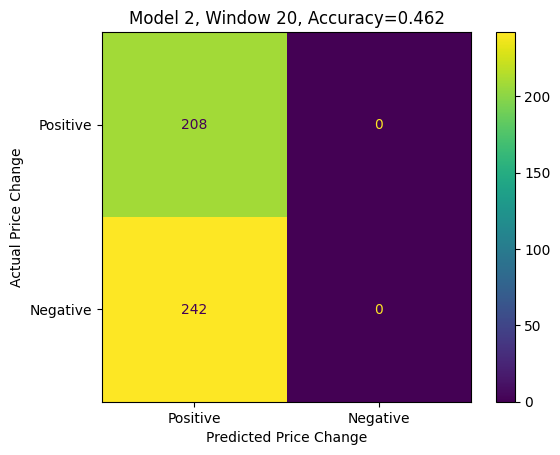

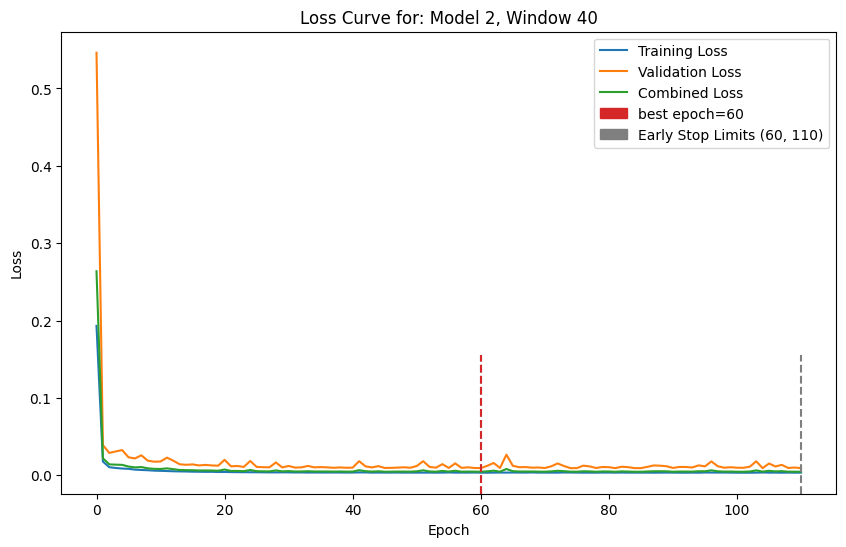

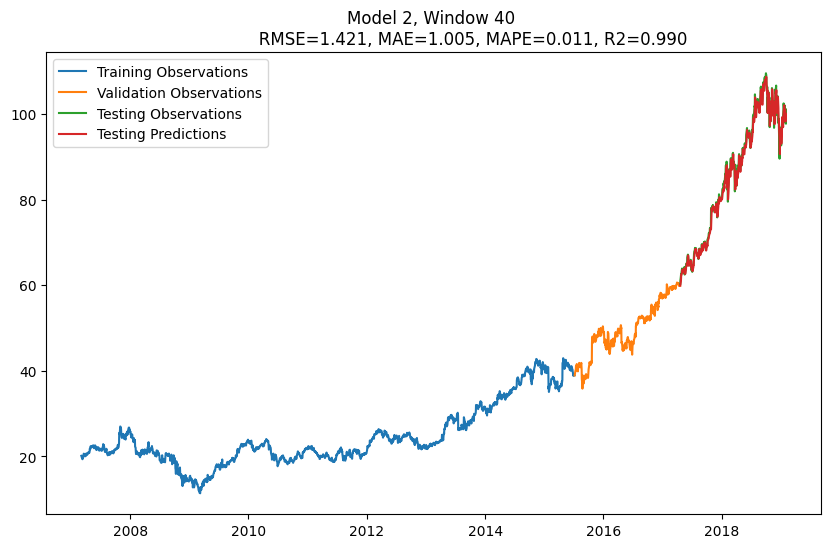

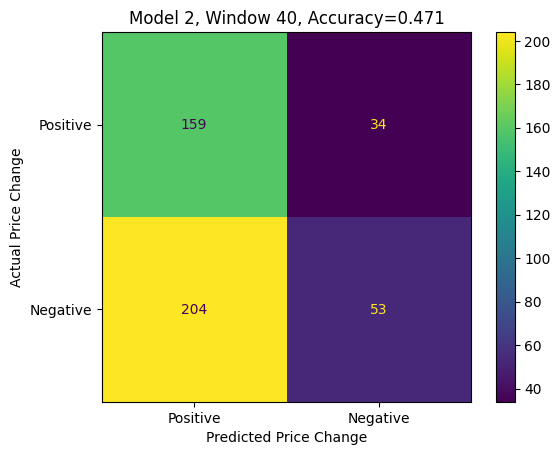

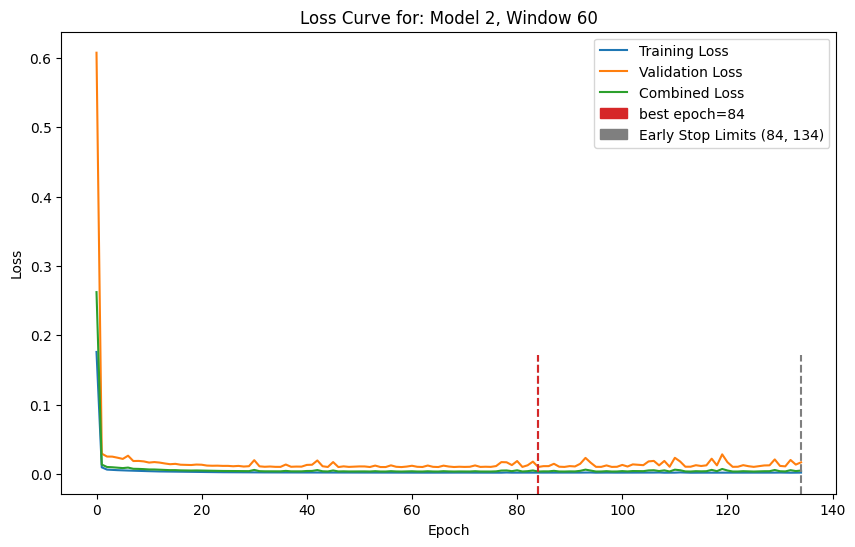

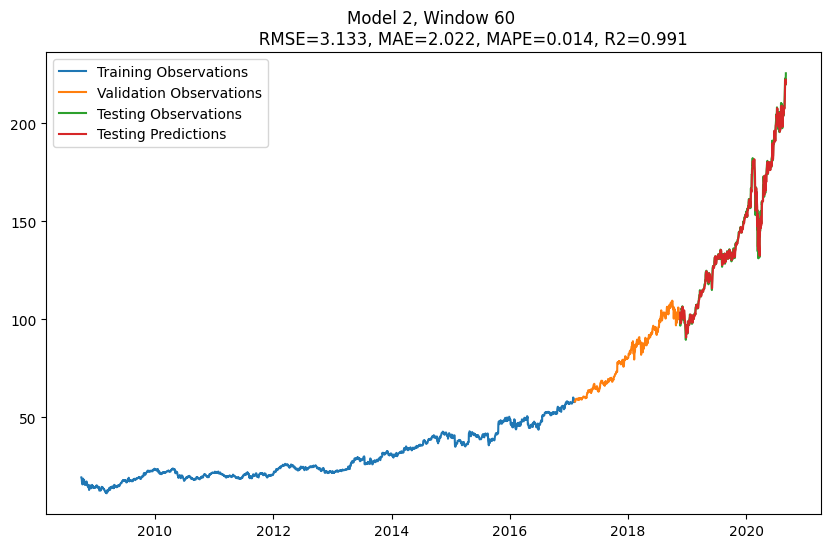

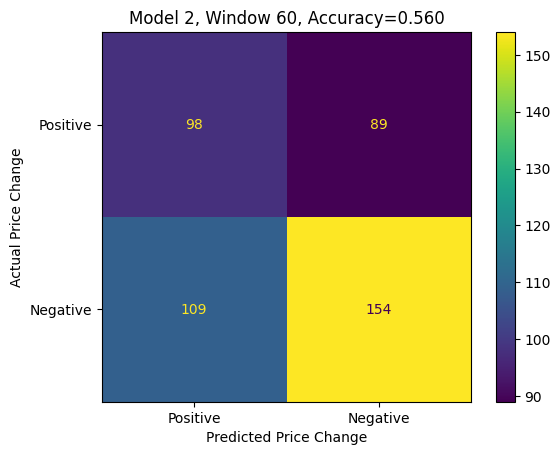

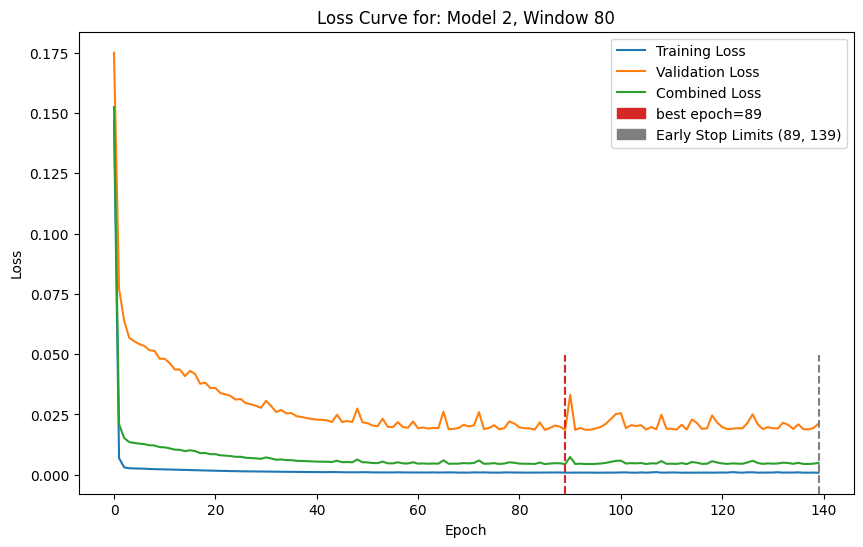

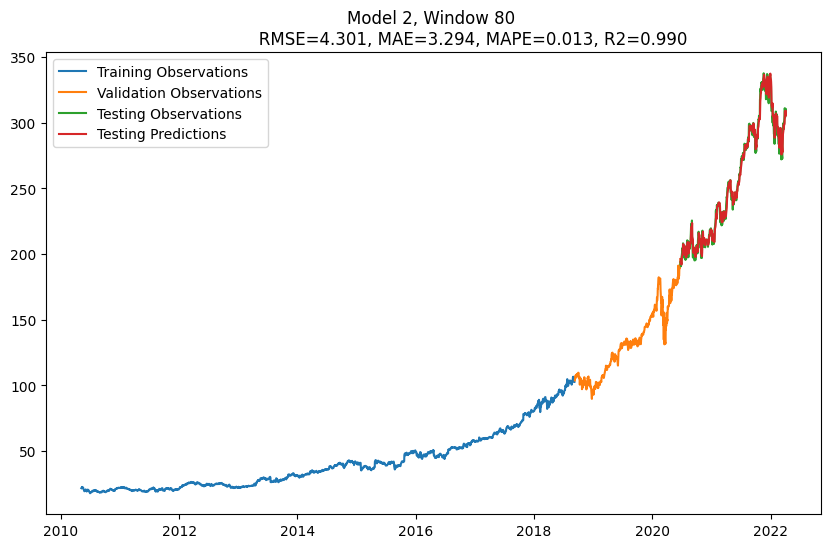

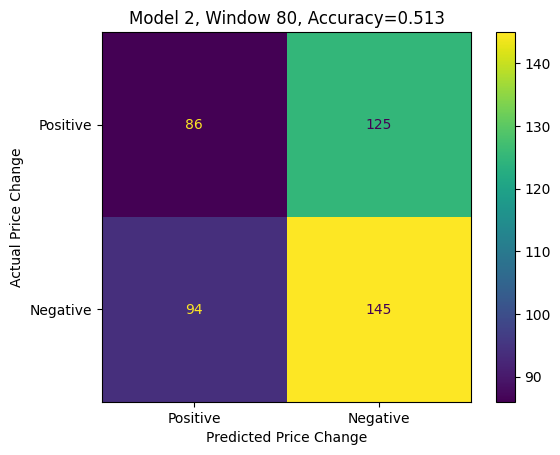

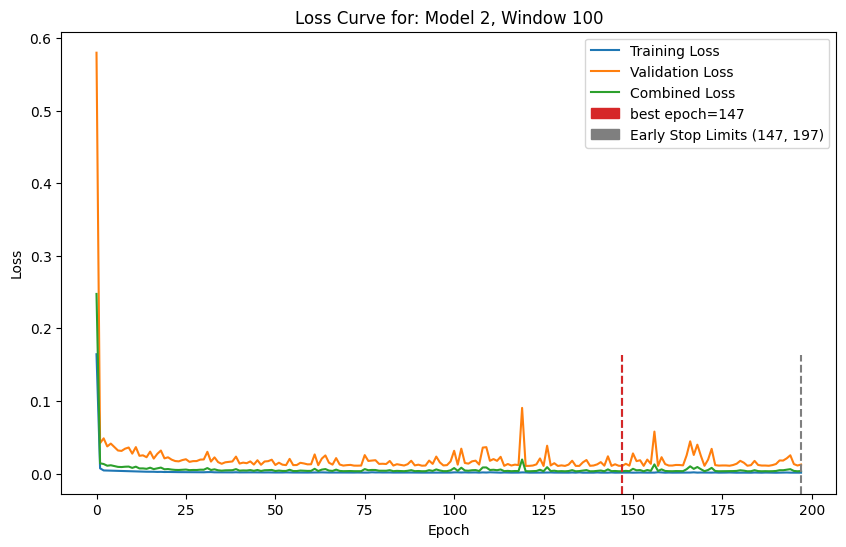

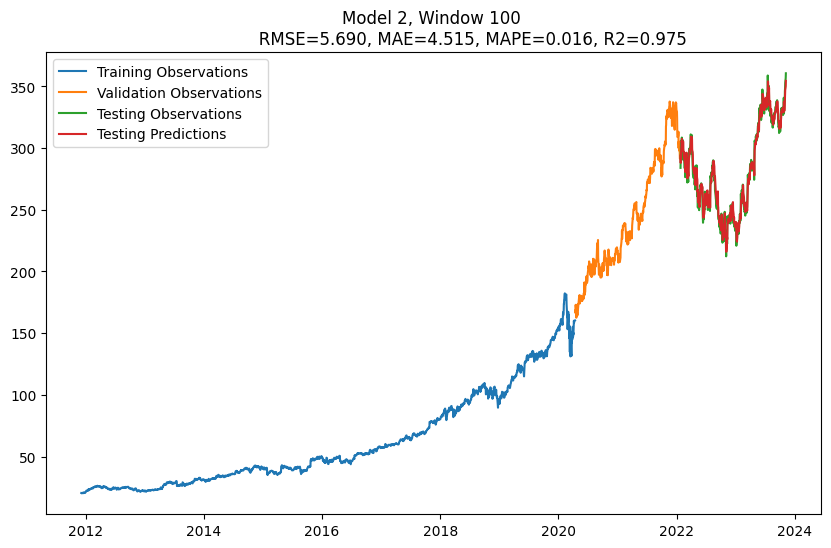

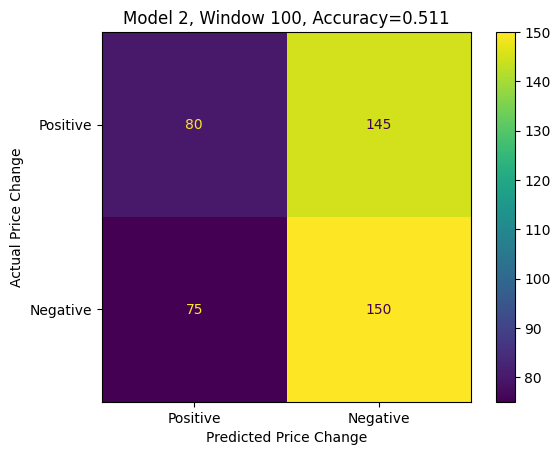

In [34]:
# CNN
run_model(models[2], 2)

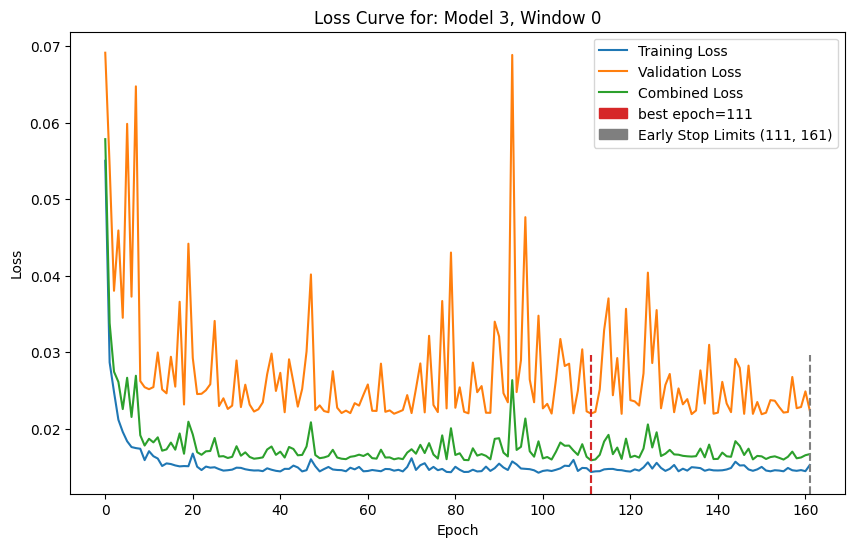

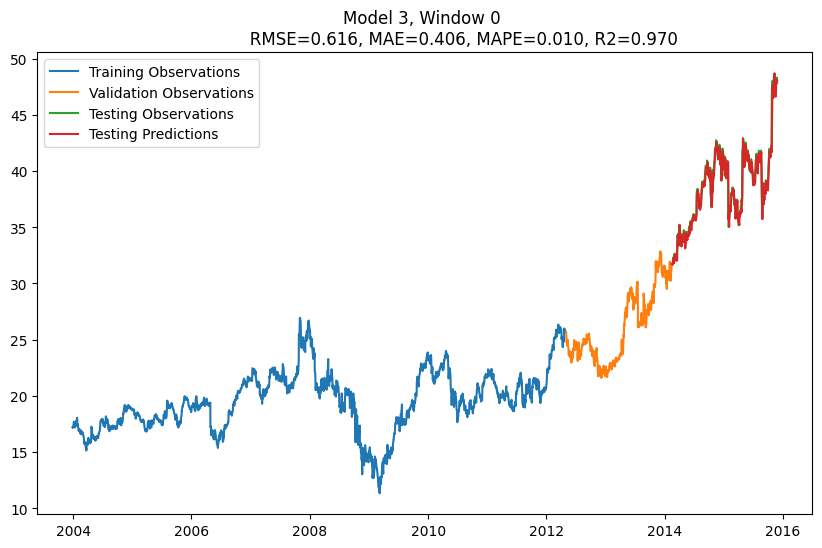

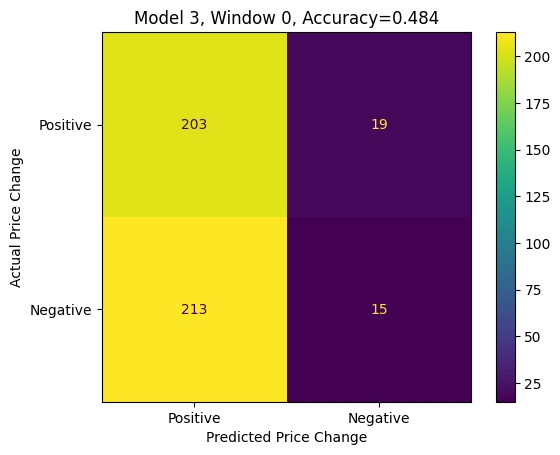

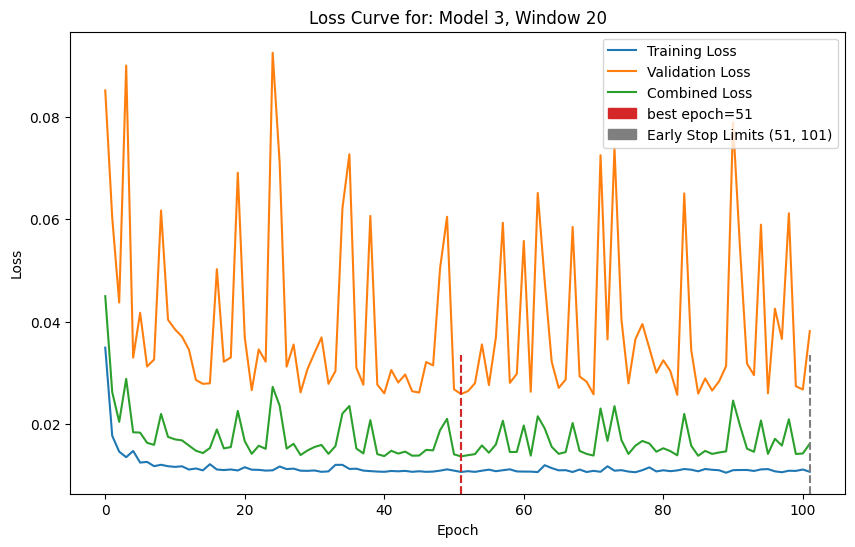

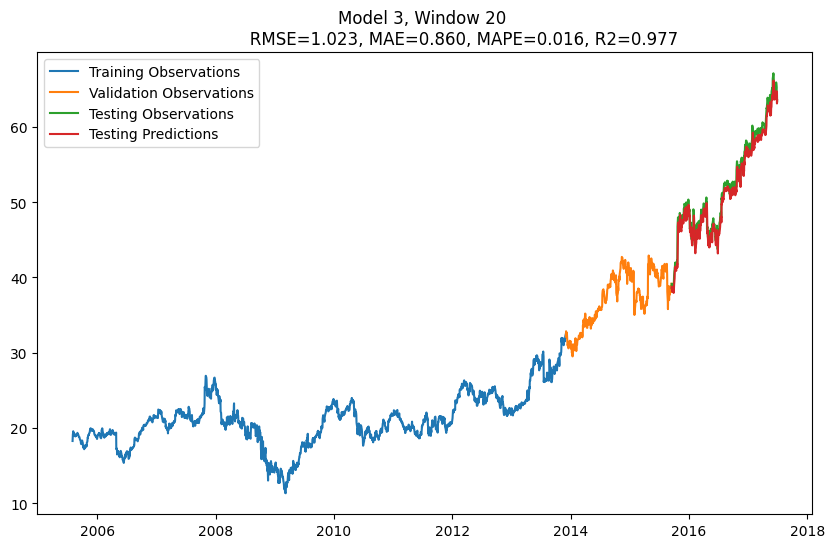

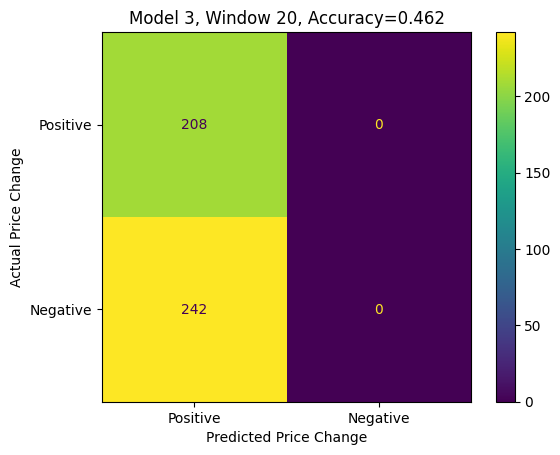

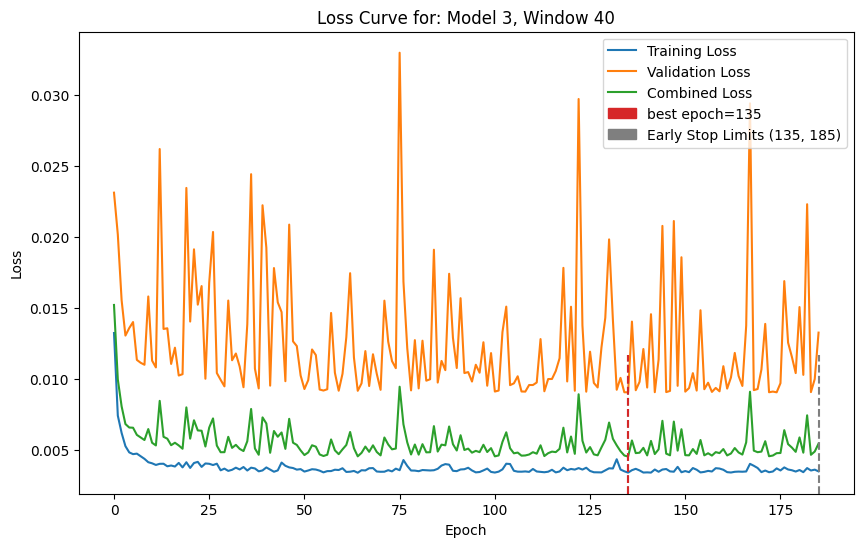

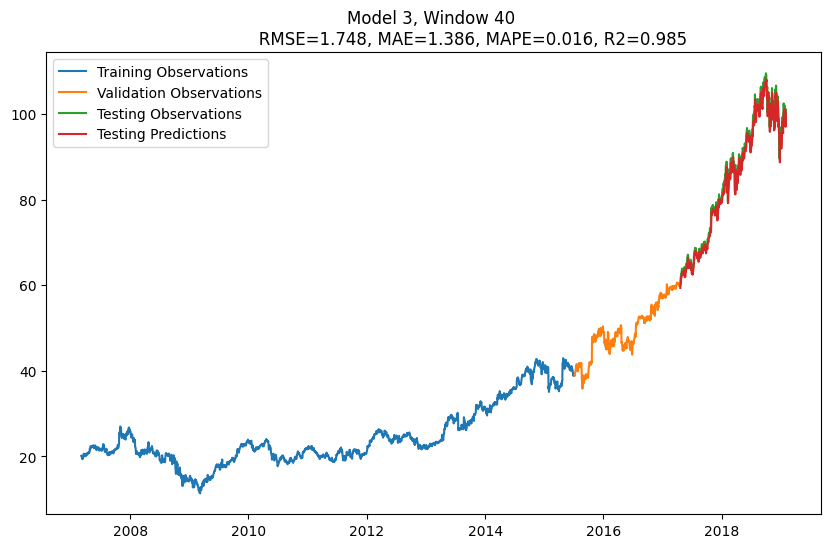

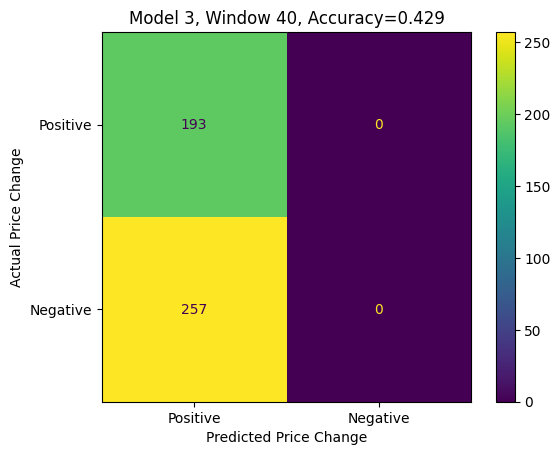

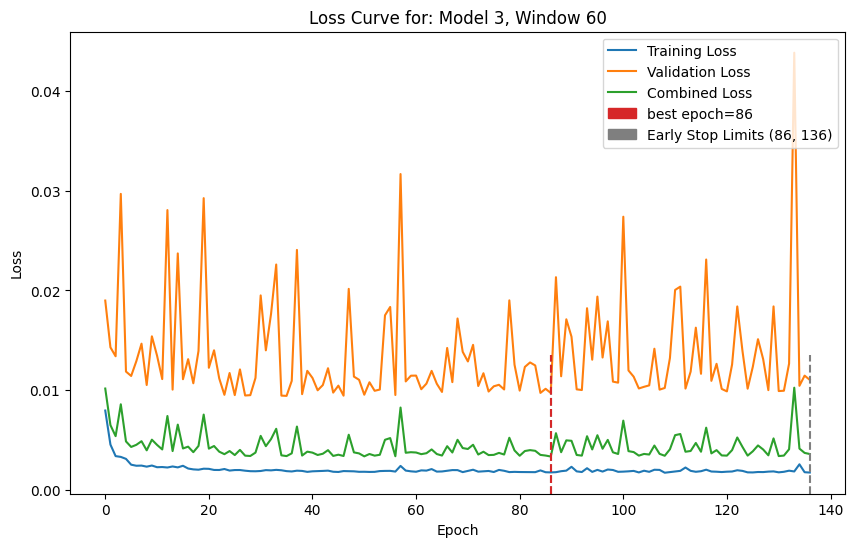

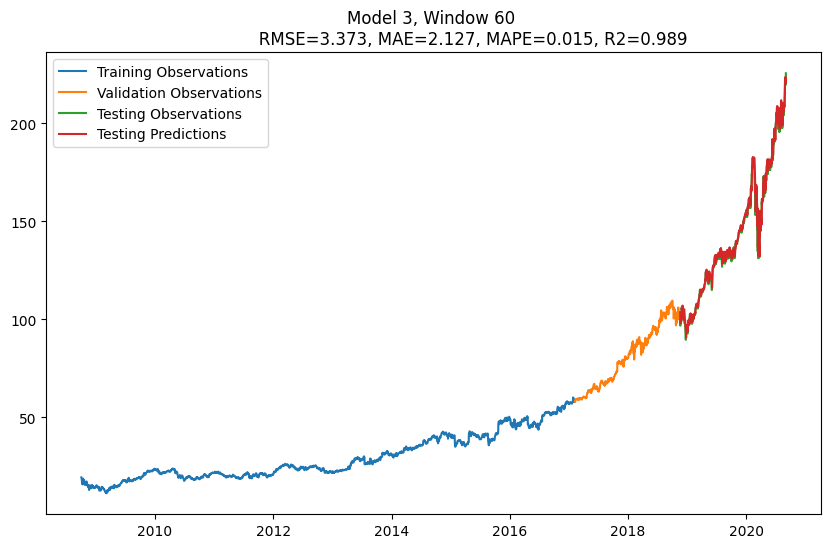

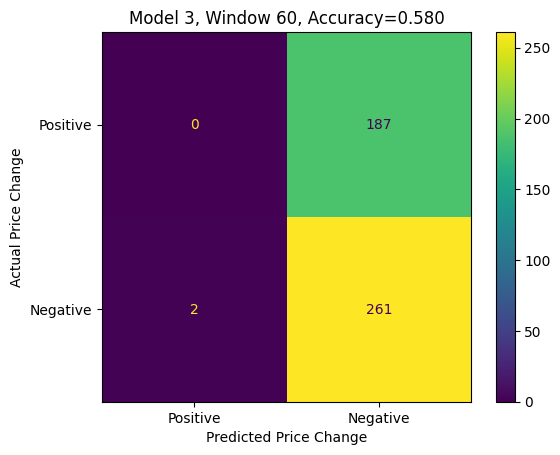

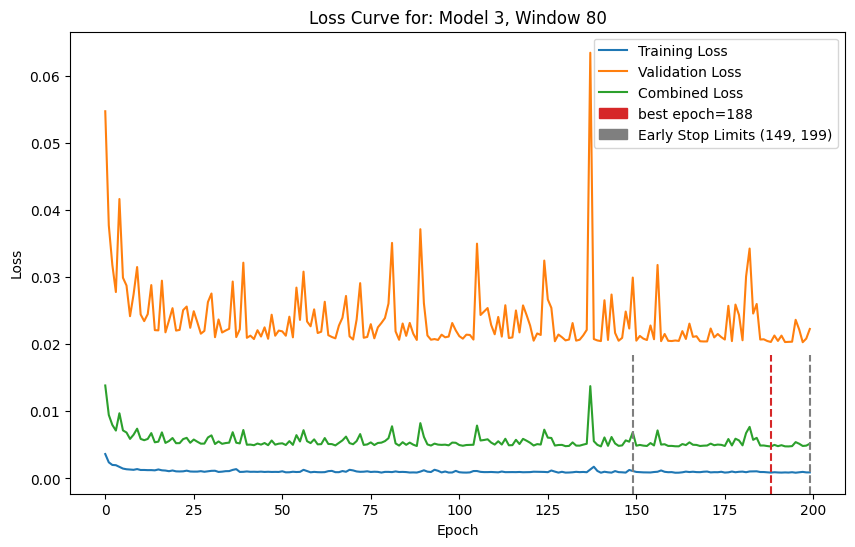

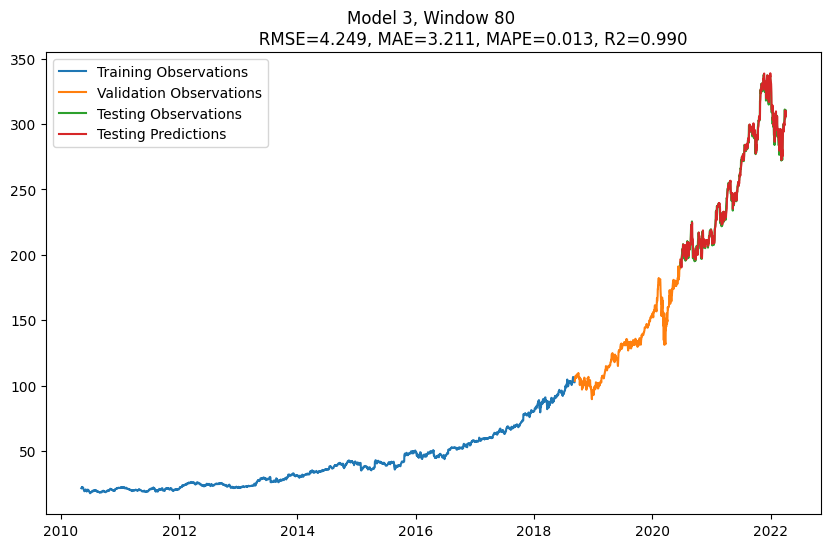

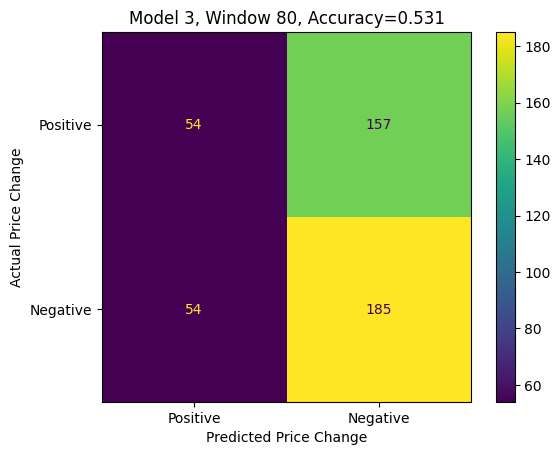

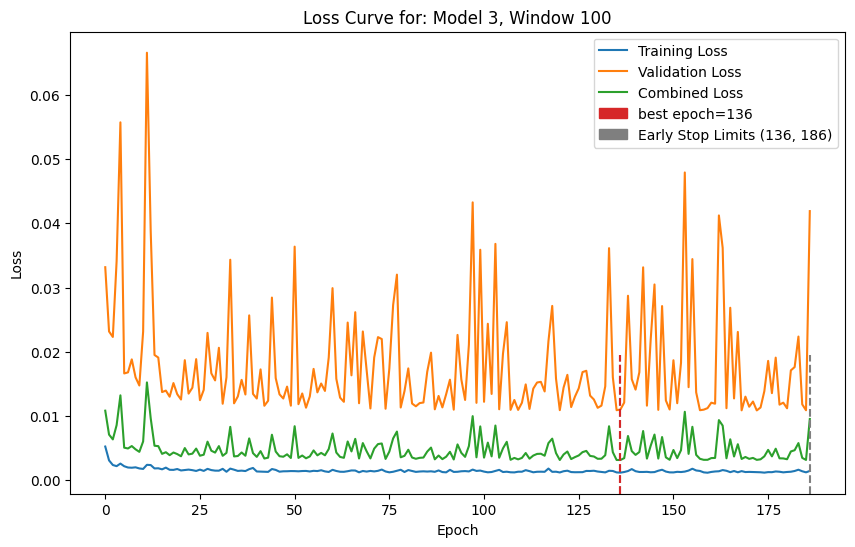

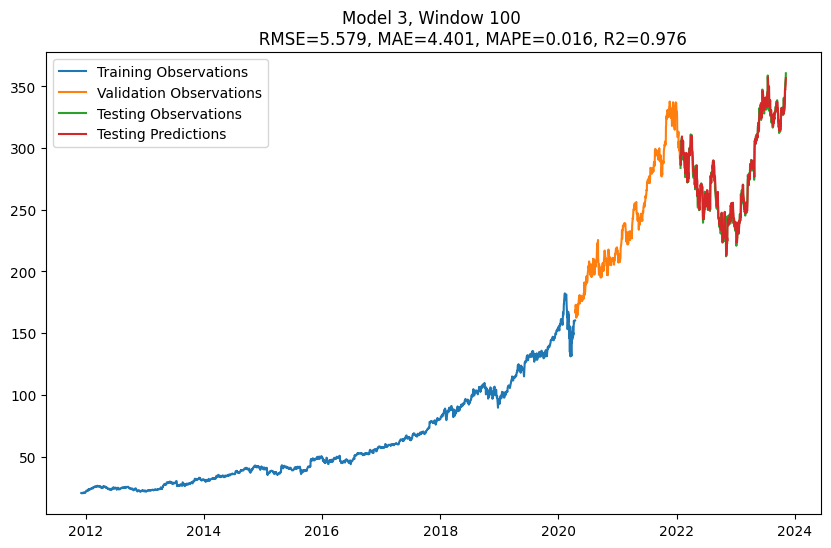

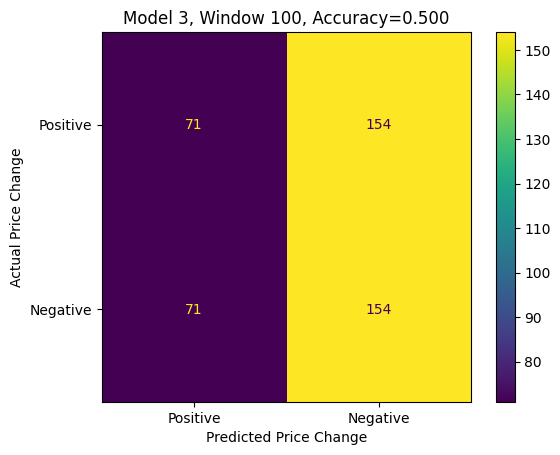

In [35]:
# Simple Neural Network
run_model(models[3], 3)

# Results

In [ ]:
# Output summary (mean, std, min, max)
for i, cv_score in enumerate(cv_scores):
    print(f"Model {i}")
    print(cv_score.describe(), "\n\n")

In [ ]:
# Section by Parameter
metrics = ["RMSE", "MAE", "MAPE", "R2", "Acc"]

evaluation = {
    "RMSE": {},
    "MAE": {},
    "MAPE": {},
    "R2": {},
    "Acc": {},
}

for model_idx, cv_score in enumerate(cv_scores):
    for param in metrics:
        evaluation[param][f"Model {model_idx}"] = cv_score[param].mean()

def plot_metric(param, logScale=False):
    """
    Plots the evaluation metrics, comparing each model
    """

    if logScale:
        plt.figure(figsize=(10,6))
        plt.title(param + " in Log Scale")
        plt.bar(list(evaluation[param].keys()), 
                list(evaluation[param].values()), 
                color="tab:orange")
        plt.xlabel("Models")
        plt.ylabel("Metrics Value")
        plt.yscale('log')
        plt.show()

    else:
        plt.figure(figsize=(10,6))
        plt.title(param)
        plt.bar(list(evaluation[param].keys()), 
                list(evaluation[param].values()))
        plt.xlabel("Models")
        plt.ylabel("Metrics Value")
        plt.show()

**Root Mean Squared Error (RMSE)** is obtained by taking the square root of the average squared deviations between actual and predicted values, divided by the total number of values. It is used to penalize larger errors and obtain a metric with the same unit as the target variable.

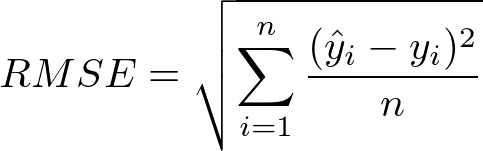

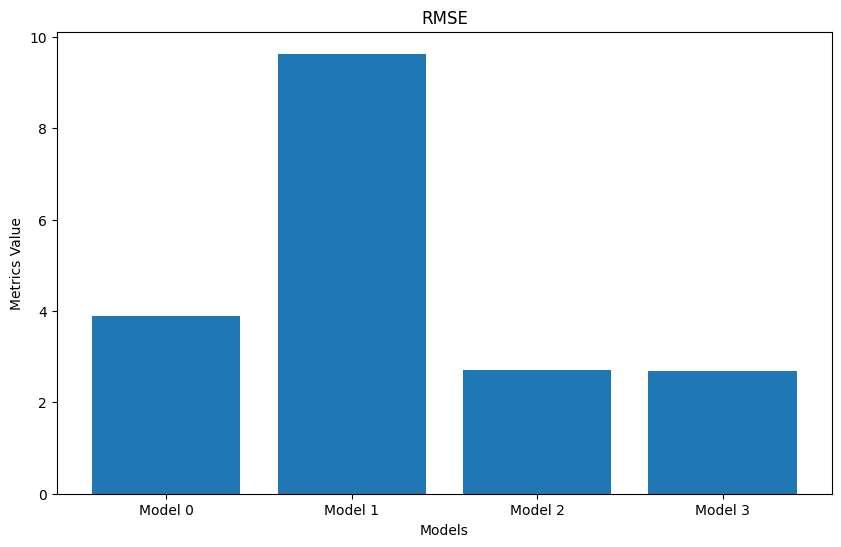

In [ ]:
plot_metric("RMSE")

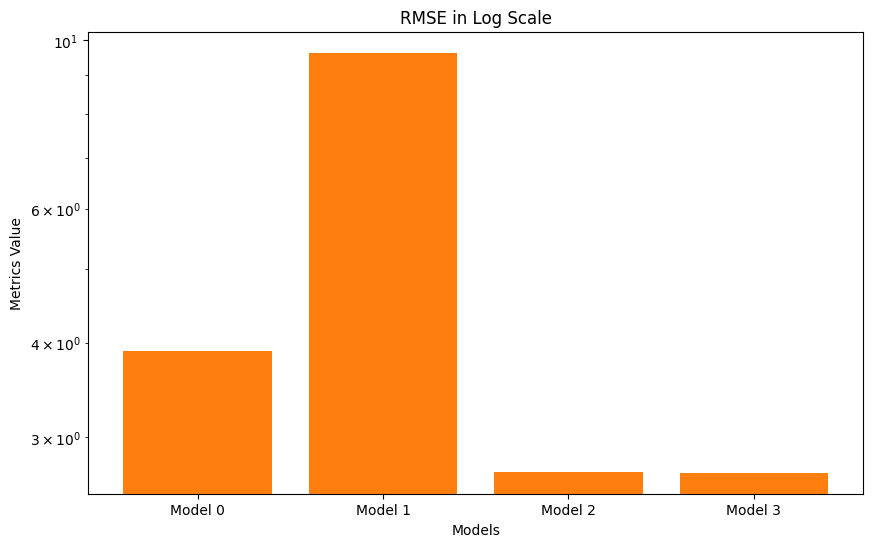

In [ ]:
plot_metric("RMSE", 1)

**Mean Absolute Error (MAE)** is calculated as the average of the absolute differences between the predicted values and the observed values. It is a popular choice for evaluating regression models across diverse domains. It also generates a value in the same unit as the target variable, but it doesn't penalize outliears as much as RMSE.

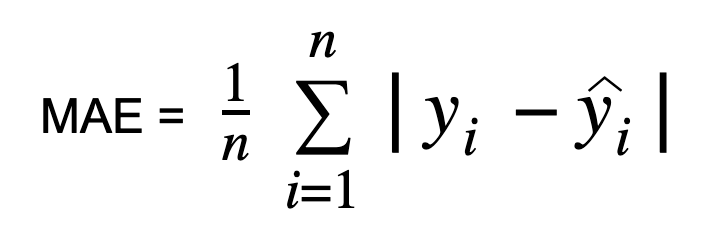

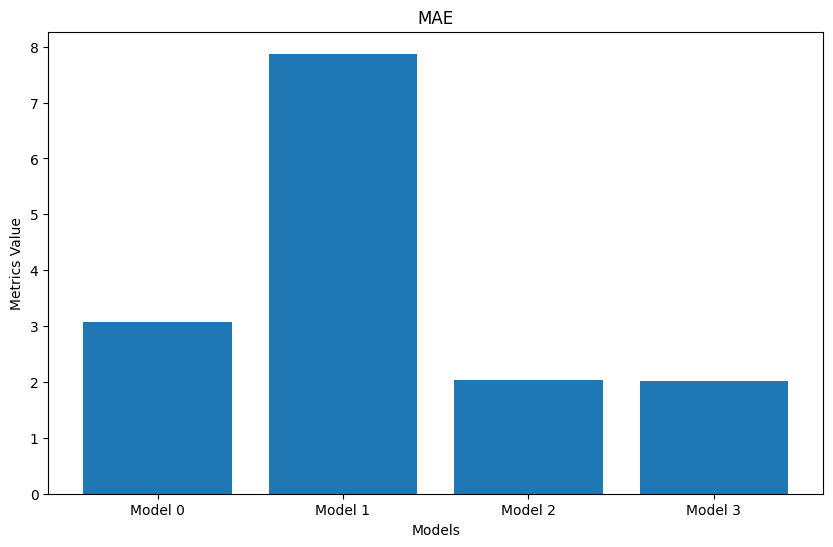

In [ ]:
plot_metric("MAE")

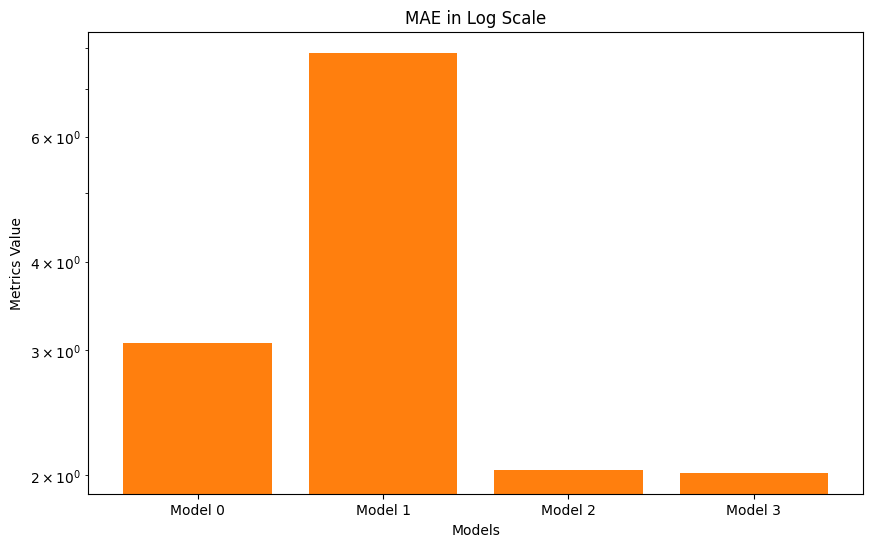

In [ ]:
plot_metric("MAE", 1)

**Mean Absolute Percentage Error (MAPE)** is calculated as the mean of the absolute differences between the observed and predicted values, divided by the observed value. It is a useful metric for forecasting because it takes into account the magnitude of errors, as well as the direction of errors. Furthermore, because it produces a value in the range of [0, 1], it's a good metric for values that varies in the long term, such as stock price forecasting. 

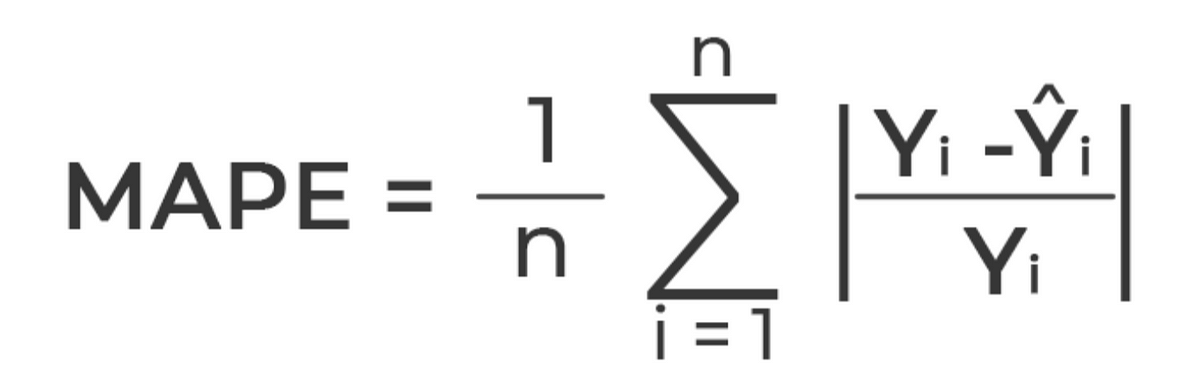

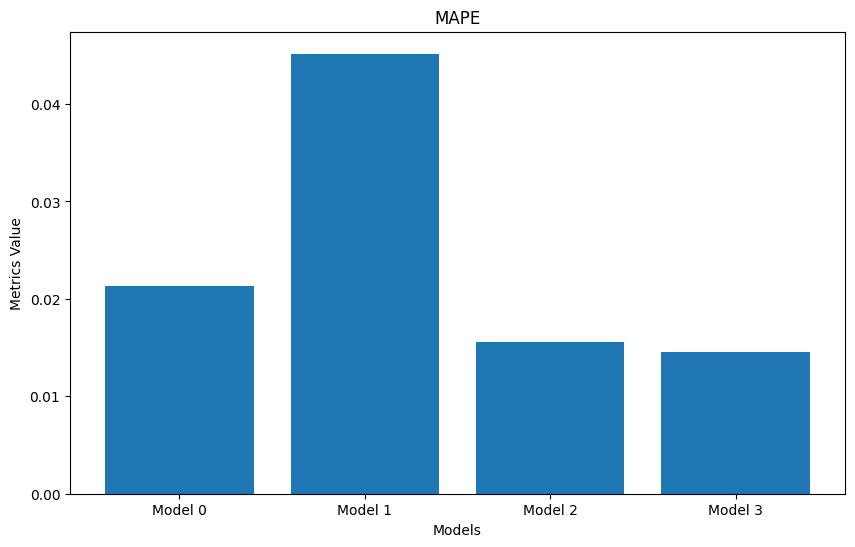

In [ ]:
plot_metric("MAPE")

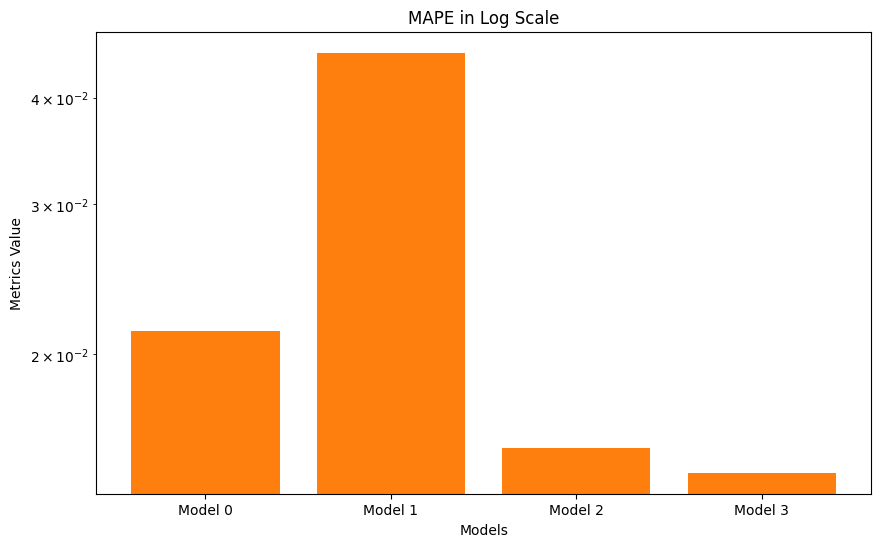

In [ ]:
plot_metric("MAPE", 1)

**R² (R-Squared)** is a measure of how well a predictive model explains the variance in the data. It is calculated by dividing the sum of the squared differences between the observed values and the predicted values by the sum of the squared differences between the observed values and the mean. It's a good metric for assessing the model's ability to explain the variance in the target variable relative to a simple average. Simply speaking, the closer the value is to 1, the better the generated curve fits the data. 

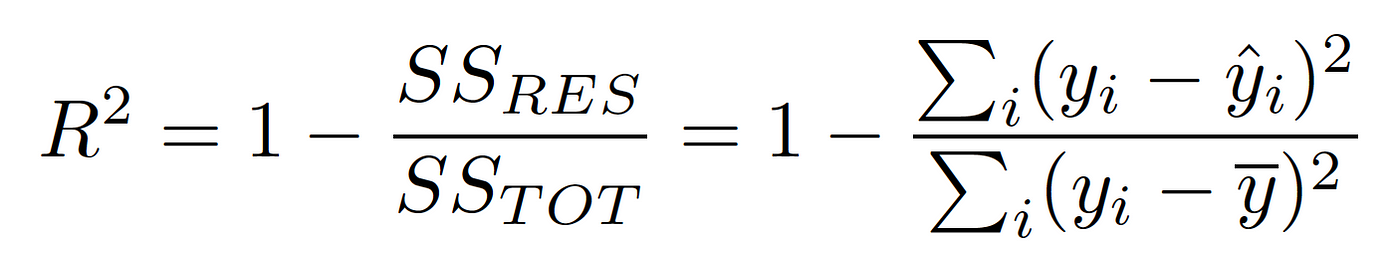

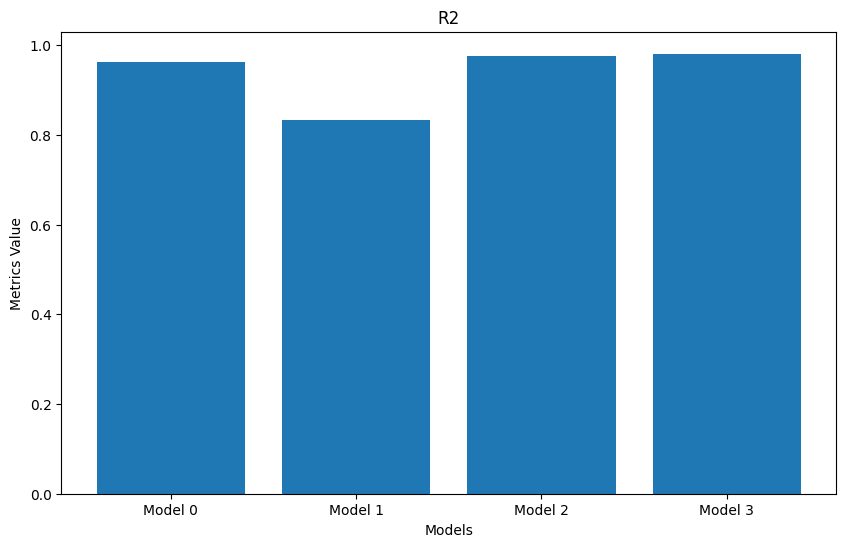

In [ ]:
plot_metric("R2")

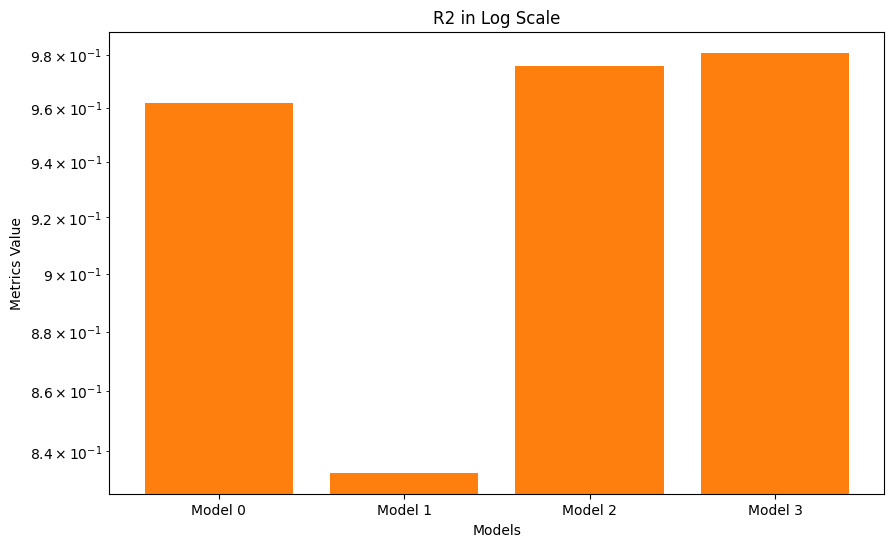

In [ ]:
plot_metric("R2", 1)

**Accuracy** is a measure of the percentage of correct answers. It is calculated by dividing the number of correct answers by the total number of inputs. In scenarios where class prevalence is uniform and the consequences of both false positives and false negatives are equivalent, accuracy emerges as an appropriate measure of performance.

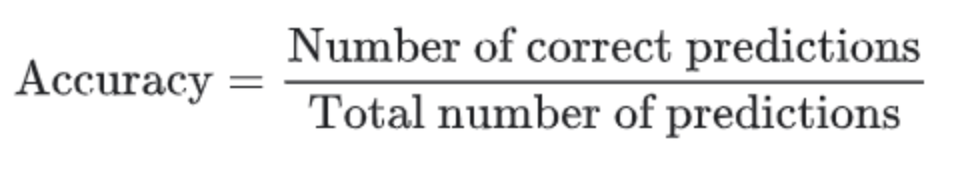

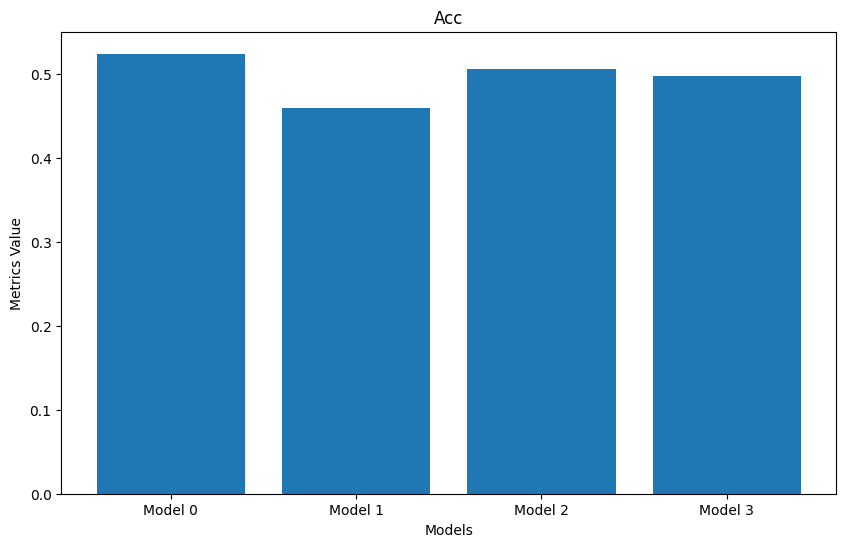

In [ ]:
plot_metric("Acc")

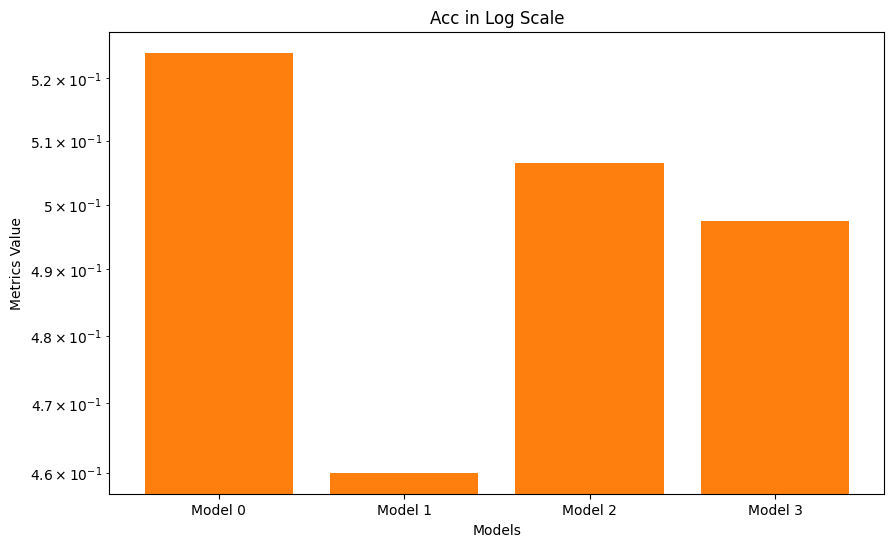

In [ ]:
plot_metric("Acc", 1)

In [ ]:
# Output complete results   
for i, cv_score in enumerate(cv_scores):
    print(f"Model {i}")
    print(cv_score)

Model 0
         RMSE       MAE      MAPE        R2       Acc
0    0.787477  0.577116  0.014655  0.950195  0.515556
1    0.961965  0.735219  0.018258  0.937613  0.526667
2    1.025013  0.775381  0.018874  0.934461  0.526667
3    1.065233  0.807187  0.019402  0.928009  0.524444
4    1.103644  0.843336  0.020038  0.923561  0.526667
..        ...       ...       ...       ...       ...
96   5.897175  4.710589  0.017182  0.968836  0.491111
97   5.945330  4.745758  0.017228  0.971457  0.495556
98   5.960590  4.739940  0.017252  0.970987  0.495556
99   5.867653  4.672015  0.016994  0.971648  0.500000
100  5.835192  4.667708  0.016916  0.973805  0.500000

[101 rows x 5 columns]
Model 1
          RMSE        MAE      MAPE        R2       Acc
0     1.335157   1.191497  0.030293  0.856827  0.493333
1     0.990914   0.788837  0.019502  0.933802  0.493333
2     0.862260   0.643464  0.015650  0.953622  0.495556
3     1.123366   0.930515  0.022504  0.919937  0.495556
4     1.392760   1.214147  0.028